# System Info

In [ ]:
import platform
print("İşletim Sistemi:", platform.system())
print("Sürüm:", platform.release())
print("Tam Bilgi:", platform.platform())

platform.system()
platform.release()
platform.platform()

İşletim Sistemi: Linux
Sürüm: 6.1.123+
Tam Bilgi: Linux-6.1.123+-x86_64-with-glibc2.35


'Linux-6.1.123+-x86_64-with-glibc2.35'

In [ ]:
!cat /etc/os-release

PRETTY_NAME="Ubuntu 22.04.4 LTS"
NAME="Ubuntu"
VERSION_ID="22.04"
VERSION="22.04.4 LTS (Jammy Jellyfish)"
VERSION_CODENAME=jammy
ID=ubuntu
ID_LIKE=debian
HOME_URL="https://www.ubuntu.com/"
SUPPORT_URL="https://help.ubuntu.com/"
BUG_REPORT_URL="https://bugs.launchpad.net/ubuntu/"
PRIVACY_POLICY_URL="https://www.ubuntu.com/legal/terms-and-policies/privacy-policy"
UBUNTU_CODENAME=jammy


# Mount Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/Yayınlarım/rice_leaf/uygulama

/content/drive/MyDrive/Yayınlarım/rice_leaf/uygulama


# Import Library and Dataset

In [ ]:
!pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 890.1 kB/s eta 0:00:00


In [3]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML
from tensorflow.keras.callbacks import Callback,EarlyStopping,ModelCheckpoint
from keras import backend
from keras.applications.mobilenet_v2 import preprocess_input
import datetime
import shutil
from keras.utils import image_dataset_from_directory
import random
print(tf.__version__)

2.19.0


In [4]:
source_path = './output/train/'
list_symptoms = ['brown_spot', 'healthy', 'leaf_blast', 'leaf_scald',  'tungro']
train_path='./output/train/'
val_path='./output/test/'
def count_splitted_img():
    train_counts = {symptoms: len(os.listdir(os.path.join(train_path, symptoms))) for symptoms in list_symptoms}
    val_counts = {symptoms: len(os.listdir(os.path.join(val_path, symptoms))) for symptoms in list_symptoms}

    for symptoms in list_symptoms:
        print(f"There are {train_counts[symptoms]} images {symptoms}")
        print(f"There are {val_counts[symptoms]} images {symptoms}\n")

#count_splitted_img()

In [6]:
BATCH_SIZE = 32
IMG_SIZE = (224, 224)
img_width = 224
img_height = 224
CHANNELS=3
EPOCHS=50


In [7]:
train_ds = image_dataset_from_directory(
    directory=train_path,
    shuffle=True,
    batch_size=BATCH_SIZE,
    image_size=IMG_SIZE,
    labels='inferred',
    label_mode='int'
)

val_ds = image_dataset_from_directory(
    directory=val_path,
    shuffle=False,
    batch_size=BATCH_SIZE,
    image_size=IMG_SIZE,
    labels='inferred',
    label_mode='int'
)
class_names = train_ds.class_names
train_ds = train_ds.map(lambda x, y: (preprocess_input(x), y))
val_ds = val_ds.map(lambda x, y: (preprocess_input(x), y))

Found 5000 files belonging to 5 classes.
Found 1000 files belonging to 5 classes.


In [9]:
class_names

['brown_spot', 'healthy', 'leaf_blast', 'leaf_scald', 'tungro']

## Show Sample Dataset

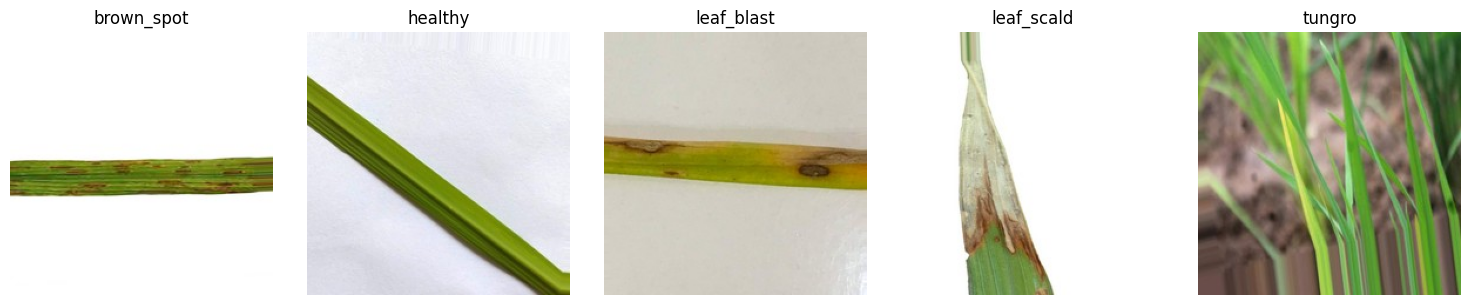

In [ ]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Veri seti bilgileri
list_symptoms = ['brown_spot', 'healthy', 'leaf_blast', 'leaf_scald', 'tungro']
train_path = './output/train/'

# Her sınıftan bir görüntüyü seçme ve görselleştirme
fig, axes = plt.subplots(1, len(list_symptoms), figsize=(15, 3))  # Yan yana göstermek için subplot

for i, symptom in enumerate(list_symptoms):
    # Sınıfın bulunduğu klasör
    symptom_path = os.path.join(train_path, symptom)

    # Klasördeki ilk görüntüyü al
    image_files = [f for f in os.listdir(symptom_path) if f.endswith(('.jpg', '.jpeg', '.png'))]
    if image_files:  # Eğer klasörde görüntü varsa
        image_path = os.path.join(symptom_path, image_files[18])
        img = mpimg.imread(image_path)

        # Görüntüyü subplot'a ekle
        axes[i].imshow(img)
        axes[i].set_title(symptom)
        axes[i].axis('off')  # Eksenleri gizle
    else:
        axes[i].set_title(f"{symptom}\n(Bulunamadı)")
        axes[i].axis('off')

plt.tight_layout()
plt.show()

## Datset Control

In [ ]:
import os

test_class_names = sorted(entry.name for entry in os.scandir(val_path) if entry.is_dir())
print("Test dataset sınıf isimleri:", test_class_names)


Test dataset sınıf isimleri: ['brown_spot', 'healthy', 'leaf_blast', 'leaf_scald', 'tungro']


In [ ]:
from tensorflow.keras.utils import image_dataset_from_directory

test_ds = image_dataset_from_directory(
    directory=val_path,
    shuffle=False,           # Etiketlerin sırasını korumak için shuffle=False önerilir
    batch_size=BATCH_SIZE,
    image_size=IMG_SIZE,
    labels='inferred',
    label_mode='int'
)

for images, labels in test_ds.take(10):  # İlk batch'i al
    print("Batch içindeki etiketler:", labels.numpy())


Found 1000 files belonging to 5 classes.
Batch içindeki etiketler: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Batch içindeki etiketler: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Batch içindeki etiketler: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Batch içindeki etiketler: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Batch içindeki etiketler: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Batch içindeki etiketler: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Batch içindeki etiketler: [0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Batch içindeki etiketler: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Batch içindeki etiketler: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Batch içindeki etiketler: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [ ]:
for batch_images, batch_labels in test_ds.take(10):
    for i in range(len(batch_labels)):
        print(f"Etiket: {batch_labels[i].numpy()}, Sınıf ismi: {test_class_names[batch_labels[i].numpy()]}")


Etiket: 0, Sınıf ismi: brown_spot
Etiket: 0, Sınıf ismi: brown_spot
Etiket: 0, Sınıf ismi: brown_spot
Etiket: 0, Sınıf ismi: brown_spot
Etiket: 0, Sınıf ismi: brown_spot
Etiket: 0, Sınıf ismi: brown_spot
Etiket: 0, Sınıf ismi: brown_spot
Etiket: 0, Sınıf ismi: brown_spot
Etiket: 0, Sınıf ismi: brown_spot
Etiket: 0, Sınıf ismi: brown_spot
Etiket: 0, Sınıf ismi: brown_spot
Etiket: 0, Sınıf ismi: brown_spot
Etiket: 0, Sınıf ismi: brown_spot
Etiket: 0, Sınıf ismi: brown_spot
Etiket: 0, Sınıf ismi: brown_spot
Etiket: 0, Sınıf ismi: brown_spot
Etiket: 0, Sınıf ismi: brown_spot
Etiket: 0, Sınıf ismi: brown_spot
Etiket: 0, Sınıf ismi: brown_spot
Etiket: 0, Sınıf ismi: brown_spot
Etiket: 0, Sınıf ismi: brown_spot
Etiket: 0, Sınıf ismi: brown_spot
Etiket: 0, Sınıf ismi: brown_spot
Etiket: 0, Sınıf ismi: brown_spot
Etiket: 0, Sınıf ismi: brown_spot
Etiket: 0, Sınıf ismi: brown_spot
Etiket: 0, Sınıf ismi: brown_spot
Etiket: 0, Sınıf ismi: brown_spot
Etiket: 0, Sınıf ismi: brown_spot
Etiket: 0, Sın

# A- Standart Mobilenetv2 Model

## Import Libraries

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.callbacks import EarlyStopping
import pickle

print("GPU:", "Var" if tf.config.list_physical_devices('GPU') else "Yok")



GPU: Var


## Sellect Base Model (MobileNetv2) For Transfer Learning

In [ ]:

img_width, img_height = 224, 224  # Görsel boyutları
tum_model = MobileNetV2(weights='imagenet', include_top=True, input_shape=(img_width, img_height, 3))

14536120/14536120 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [ ]:
tum_model.summary()

Model: "mobilenetv2_1.00_224"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 3,538,984 (13.50 MB)

 Trainable params: 3,504,872 (13.37 MB)

 Non-trainable params: 34,112 (133.25 KB)

In [ ]:

img_width, img_height = 224, 224  # Görsel boyutları
use_model = "mobilenet"  # "mobilenet" veya "efficientnet"

if use_model == "mobilenet":
    base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))
elif use_model == "efficientnet":
    base_model = EfficientNetV2S(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

base_model.trainable = False
base_model.summary()



Model: "mobilenetv2_1.00_224"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_9       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer_9[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 2,257,984 (8.61 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 2,257,984 (8.61 MB)


## Adding Trainable FC Blocks



In [ ]:
def build_model(hp):
    if hp['activation'] == 'leaky_relu':
        activation = LeakyReLU(alpha=hp['leaky_relu_alpha'])
    else:
        activation = 'relu'

    model = tf.keras.models.Sequential([
        base_model,
        tf.keras.layers.GlobalAveragePooling2D(),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation=activation, kernel_regularizer=tf.keras.regularizers.l2(hp['kernel_reg'])),
        tf.keras.layers.Dropout(hp['drop_out']),
        tf.keras.layers.Dense(256, activation=activation, kernel_regularizer=tf.keras.regularizers.l2(hp['kernel_reg'])),
        tf.keras.layers.Dropout(hp['drop_out']),
        tf.keras.layers.Dense(128, activation=activation, kernel_regularizer=tf.keras.regularizers.l2(hp['kernel_reg'])),
        tf.keras.layers.Dense(len(class_names), activation='softmax')
    ])

    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=hp['learning_rate']),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model


## Best Hyperparameters

In [ ]:
best_hp = {
    'learning_rate': 0.00001,
    'activation': 'leaky_relu',
    'leaky_relu_alpha': 0.1,
    'drop_out': 0.6,
    'kernel_reg': 1e-4
}

model = build_model(best_hp)
model.summary()



Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_6      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 512)            │       655,872 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,078,725 (11.74 MB)

 Trainable params: 820,741 (3.13 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

## Feature Extraction

In [ ]:

EPOCHS = 100  # İlk eğitim epoch sayısı

early_stopping = EarlyStopping(
    monitor="val_loss",
    min_delta=0.001,
    patience=15,
    verbose=1,
    mode="auto",
    restore_best_weights=False
)

with tf.device('/GPU:0'):
    history = model.fit(
        train_ds,
        epochs=EPOCHS,
        validation_data=val_ds,
        callbacks=[early_stopping]
    )



Epoch 1/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 26s 107ms/step - accuracy: 0.2101 - loss: 2.4040 - val_accuracy: 0.4540 - val_loss: 1.5291
Epoch 2/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 8s 48ms/step - accuracy: 0.2799 - loss: 1.9214 - val_accuracy: 0.5380 - val_loss: 1.4065
Epoch 3/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 8s 49ms/step - accuracy: 0.3398 - loss: 1.7158 - val_accuracy: 0.5900 - val_loss: 1.3142
Epoch 4/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 8s 48ms/step - accuracy: 0.4022 - loss: 1.5718 - val_accuracy: 0.6230 - val_loss: 1.2357
Epoch 5/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 8s 48ms/step - accuracy: 0.4656 - loss: 1.4519 - val_accuracy: 0.6350 - val_loss: 1.1697
Epoch 6/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 8s 48ms/step - accuracy: 0.4929 - loss: 1.3818 - val_accuracy: 0.6500 - val_loss: 1.1155
Epoch 7/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 8s 48ms/step - accuracy: 0.5339 - loss: 1.3012 - val_accuracy: 0.6720 - val_loss: 1.0596
Epoch 8/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 8s 48ms/step - accuracy: 0.5733 - loss: 1.2248 

## Save Model and History

In [ ]:
import pickle
import os
import tensorflow as tf

# Ensure the output directory exists
output_dir = './sonuc'
os.makedirs(output_dir, exist_ok=True)

# Save training history
history_file = os.path.join(output_dir, 'mobilenetv2_history.pkl')
try:
    with open(history_file, 'wb') as f:
        pickle.dump(history.history, f)
    print(f"Training history saved: {history_file}")
except Exception as e:
    print(f"Error saving history: {e}")

# Save model in native Keras format
model_file = os.path.join(output_dir, 'rice_model.keras')
try:
    model.save(model_file)
    print(f"Model saved: {model_file}")
except Exception as e:
    print(f"Error saving model: {e}")

Training history saved: ./sonuc/mobilenetv2_history.pkl
Model saved: ./sonuc/rice_model.keras


## Plot Training Charts

Eğitim geçmişi başarıyla yüklendi: ./sonuc/mobilenetv2_history.pkl
Eğitim geçmişi metrikleri: ['accuracy', 'loss', 'val_accuracy', 'val_loss']


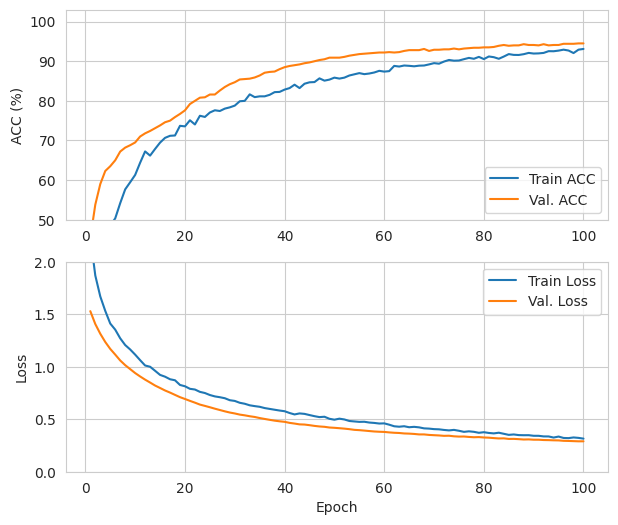

In [ ]:
import pickle
import matplotlib.pyplot as plt
import numpy as np

# Dosya yolları
history_file = './sonuc/mobilenetv2_history.pkl'


# Eğitim geçmişini geri yükleme
try:
    with open(history_file, 'rb') as f:
        history = pickle.load(f)
    print(f"Eğitim geçmişi başarıyla yüklendi: {history_file}")
    print("Eğitim geçmişi metrikleri:", list(history.keys()))
except Exception as e:
    print(f"Eğitim geçmişi yüklenirken hata oluştu: {e}")
    exit(1)

# Doğruluk verilerini % çevir
acc = [x * 100 for x in history['accuracy']]
val_acc = [x * 100 for x in history['val_accuracy']]

# Kayıp verileri
loss = history['loss']
val_loss = history['val_loss']

# Epoch sayısı
epochs_range = range(1, len(acc) + 1)

# === Y ekseni aralıklarını buradan ayarla ===
acc_ylim = (50, 103)   # doğruluk grafiği y aralığı
loss_ylim = (0.0, 2)   # kayıp grafiği y aralığı

# Grafik çizimi
plt.figure(figsize=(7, 6))

# Doğruluk grafiği
plt.subplot(2, 1, 1)
plt.plot(epochs_range, acc, label='Train ACC')
plt.plot(epochs_range, val_acc, label='Val. ACC')
plt.ylabel('ACC (%)')
plt.yticks(np.arange(0, 101, 10))  # 0,10,20,...100
plt.ylim(acc_ylim)
plt.legend(loc='lower right')

# Kayıp grafiği
plt.subplot(2, 1, 2)
plt.plot(epochs_range, loss, label='Train Loss')
plt.plot(epochs_range, val_loss, label='Val. Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.ylim(loss_ylim)
plt.legend(loc='upper right')

plt.savefig('./fig/mobilenetv2_history.png')
plt.show()


## Testing Phase for Base Model

In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

model_file = './sonuc/rice_model.keras'

# Modeli geri yükleme
try:
    model = tf.keras.models.load_model(model_file)
    print(f"Model başarıyla yüklendi: {model_file}")
    #model.summary()  # Model mimarisini göster
except Exception as e:
    print(f"Model yüklenirken hata oluştu: {e}")
    exit(1)

# Evaluate the model
loss, acc = model.evaluate(val_ds)
print(f"Test Accuracy: {acc:.4f}")

# Get true labels and predictions
y_true = np.concatenate([y for x, y in val_ds], axis=0)
y_pred_probs = model.predict(val_ds)
y_pred = np.argmax(y_pred_probs, axis=1)

num_classes = len(class_names)



Model başarıyla yüklendi: ./sonuc/rice_model.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 7s 99ms/step - accuracy: 0.9380 - loss: 0.3127
Test Accuracy: 0.9450
32/32 ━━━━━━━━━━━━━━━━━━━━ 7s 126ms/step



Classification Report:
              precision    recall  f1-score   support

  Brown Spot     0.8682    0.9550    0.9095       200
     Healthy     0.9412    0.9600    0.9505       200
  Leaf Blast     0.9538    0.8250    0.8847       200
  Leaf Scald     0.9900    0.9950    0.9925       200
      Tungro     0.9802    0.9900    0.9851       200

    accuracy                         0.9450      1000
   macro avg     0.9467    0.9450    0.9445      1000
weighted avg     0.9467    0.9450    0.9445      1000



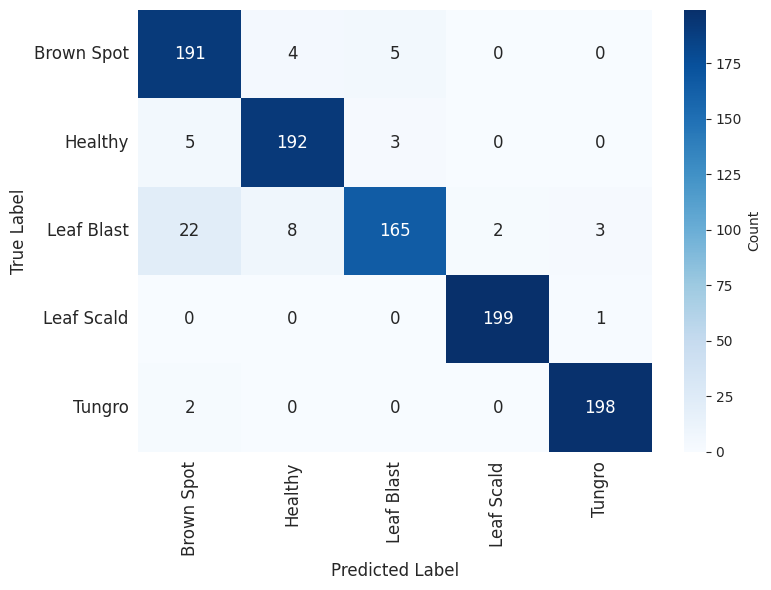

In [ ]:

# Create dictionary to map original class names to formatted names
class_name_map = {name: name.replace('_', ' ').title() for name in class_names}
formatted_class_names = [class_name_map[name] for name in class_names]

# Print classification report with formatted class names
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=formatted_class_names, digits=4))

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix with customized settings
def plot_confusion_matrix(cm, class_names, fontsize=12):
    plt.figure(figsize=(8, 6))
    sns.heatmap(
        cm,
        annot=True,
        fmt="d",
        cmap="Blues",
        xticklabels=class_names,
        yticklabels=class_names,
        annot_kws={"size": fontsize},
        cbar_kws={'label': 'Count'}
    )
    plt.xlabel("Predicted Label", fontsize=fontsize)
    plt.ylabel("True Label", fontsize=fontsize)
    plt.xticks(rotation=90, fontsize=fontsize)  # Vertical x-axis labels
    plt.yticks(rotation=0, fontsize=fontsize)   # Horizontal y-axis labels
    #plt.title("Confusion Matrix for Rice Disease Classification", fontsize=fontsize + 2)
    plt.tight_layout()  # Adjust layout to prevent label cropping
    plt.savefig('./fig/mobilenetv2_confusion_matrix.png', dpi=300, bbox_inches='tight')  # Save with tight bounding box
    plt.show()

# Plot the confusion matrix
plot_confusion_matrix(cm, formatted_class_names)

## Transform standart Model to TFLITE

In [ ]:
model.save('./sonuc/rice_model.h5')
modelCNN = tf.keras.models.load_model('./sonuc/rice_model.h5')
converter = tf.lite.TFLiteConverter.from_keras_model(modelCNN)
tflite_model = converter.convert()
with open('./sonuc/rice_model_v4_mobilenetv2.tflite', 'wb') as f:
    f.write(tflite_model)


Saved artifact at '/tmp/tmpxas5tu57'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='input_layer_3')
Output Type:
  TensorSpec(shape=(None, 5), dtype=tf.float32, name=None)
Captures:
  136427681623376: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136427681624720: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136427681624528: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136427681624144: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136427681625296: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136427681623760: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136427681624912: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136427681625104: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136427681623568: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136427681626256: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1364276816256

# B- DualBranch MobileNetV2 with Lightweight Attention + QAT

## Set GPU Platform

In [9]:
import tensorflow as tf

# GPU'nun mevcut olup olmadığını kontrol etme
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

# Eğer GPU mevcutsa, bellek büyümesini etkinleştirme
if tf.config.list_physical_devices('GPU'):
    try:
        # GPU'ya bellek büyümesini etkinleştirme
        gpus = tf.config.list_physical_devices('GPU')
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        print("GPU bellek büyümesi etkinleştirildi.")
    except RuntimeError as e:
        # Bellek büyümesi etkinleştirilemezse hatayı yazdırma
        print(e)
else:
    print("GPU mevcut değil, CPU kullanılıyor.")

Num GPUs Available:  1
Physical devices cannot be modified after being initialized


## 1. Create DBLA Model

In [10]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import (GlobalAveragePooling2D, Dense, Concatenate,
                                     Input, Dropout, Multiply, Reshape)
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras import backend as K

# GPU kontrolü ve bellek büyümesini etkinleştirme
if tf.config.list_physical_devices('GPU'):
    try:
        gpus = tf.config.list_physical_devices('GPU')
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        print("GPU bellek büyümesi etkinleştirildi.")
    except RuntimeError as e:
        print(e)
else:
    print("GPU mevcut değil, CPU kullanılıyor.")

# --- SE (Squeeze-and-Excitation) Bloğu ---
def se_block(x, ratio=16, l2_reg=0.0, name=None):
    """Channel attention: GAP -> FC(relu) -> FC(sigmoid) -> scale"""
    channels = K.int_shape(x)[-1]
    assert channels is not None, "Kanal sayısı None; giriş katmanını kontrol edin."

    se = GlobalAveragePooling2D(name=f'{name}_gap' if name else None)(x)         # [B, C]
    se = Dense(max(channels // ratio, 1), activation='relu',
               kernel_regularizer=l2(l2_reg),
               name=f'{name}_fc1' if name else None)(se)                          # [B, C//r]
    se = Dense(channels, activation='sigmoid',
               kernel_regularizer=l2(l2_reg),
               name=f'{name}_fc2' if name else None)(se)                          # [B, C]
    se = Reshape((1, 1, channels), name=f'{name}_reshape' if name else None)(se)  # [B,1,1,C]
    x = Multiply(name=f'{name}_scale' if name else None)([x, se])                 # ölçekleme
    return x

# --- 1. Aşama: Model Tanımlama (SE entegre) ---
def create_dual_branch_model(img_width, img_height, num_classes, l2_reg=0.001,
                             se_ratio=8):
    base_model = MobileNetV2(weights='imagenet', include_top=False,
                             input_shape=(img_width, img_height, 3))
    base_model.trainable = False

    input_tensor = base_model.input

    # Birincil kol (derin özellikler) + SE
    main_branch_output = base_model.output                           # [B, 7,7,1280]
    main_branch_output = se_block(main_branch_output, ratio=se_ratio,
                                  l2_reg=l2_reg, name='se_main')
    main_branch_features = GlobalAveragePooling2D(name='gap_main')(main_branch_output)

    # İkincil kol (daha sığ özellikler) + SE
    aux_branch_output = base_model.get_layer('block_5_add').output   # ör: [B, 28,28,96]
    aux_branch_output = se_block(aux_branch_output, ratio=se_ratio,
                                 l2_reg=l2_reg, name='se_aux')
    aux_branch_features = GlobalAveragePooling2D(name='gap_aux')(aux_branch_output)

    # Özellikleri birleştirme
    combined_features = Concatenate(name='feature_concat')([main_branch_features,
                                                            aux_branch_features])

    # Sınıflandırma katmanları (Dropout + L2)
    x = Dense(512, activation='relu', kernel_regularizer=l2(l2_reg), name='fc_1')(combined_features)
    x = Dropout(0.5, name='drop_1')(x)
    x = Dense(256, activation='relu', kernel_regularizer=l2(l2_reg), name='fc_2')(x)
    x = Dropout(0.5, name='drop_2')(x)
    output_tensor = Dense(num_classes, activation='softmax', name='pred')(x)

    model = Model(inputs=input_tensor, outputs=output_tensor, name='MobileNetV2_Dual_SE')
    return model

# Model parametreleri ve oluşturma
img_width, img_height = 224, 224
num_classes = 5
model = create_dual_branch_model(img_width, img_height, num_classes, l2_reg=0.001, se_ratio=8)

# Derleme
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

# (Opsiyonel) Callback'ler örneği:
callbacks = [
    EarlyStopping(patience=10, restore_best_weights=True, monitor='val_loss'),
    ReduceLROnPlateau(patience=5, factor=0.5, min_lr=1e-6, monitor='val_loss')
]

# Eğitim örneği:
# history = model.fit(train_ds, validation_data=val_ds, epochs=100, callbacks=callbacks)

# (İleri aşama) İnce ayar için bazı blokları açmak:
# for layer in model.get_layer('MobilenetV2').layers[-20:]:
#     layer.trainable = True
# model.compile(optimizer=tf.keras.optimizers.Adam(1e-5),
#               loss='sparse_categorical_crossentropy', metrics=['accuracy'])


Physical devices cannot be modified after being initialized


Model: "MobileNetV2_Dual_SE"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer_1[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 3,474,185 (13.25 MB)

 Trainable params: 1,216,201 (4.64 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

## Fitting 1 kez eğittikten sonra kullan

In [ ]:

model_file = './sonuc/dbla_rice_model.keras'

# Modeli geri yükleme
try:
    model = tf.keras.models.load_model(model_file)
    print(f"Model başarıyla yüklendi: {model_file}")
    #model.summary()  # Model mimarisini göster
except Exception as e:
    print(f"Model yüklenirken hata oluştu: {e}")
    exit(1)
# (İleri aşama) İnce ayar için bazı blokları açmak:
for layer in model.get_layer('MobilenetV2').layers[-20:]:
   layer.trainable = True
model.compile(optimizer=tf.keras.optimizers.Adam(1e-5),
              loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Model başarıyla yüklendi: ./sonuc/dbla_rice_model.keras


ValueError: No such layer: MobilenetV2. Existing layers are: ['input_layer_1', 'Conv1', 'bn_Conv1', 'Conv1_relu', 'expanded_conv_depthwise', 'expanded_conv_depthwise_BN', 'expanded_conv_depthwise_relu', 'expanded_conv_project', 'expanded_conv_project_BN', 'block_1_expand', 'block_1_expand_BN', 'block_1_expand_relu', 'block_1_pad', 'block_1_depthwise', 'block_1_depthwise_BN', 'block_1_depthwise_relu', 'block_1_project', 'block_1_project_BN', 'block_2_expand', 'block_2_expand_BN', 'block_2_expand_relu', 'block_2_depthwise', 'block_2_depthwise_BN', 'block_2_depthwise_relu', 'block_2_project', 'block_2_project_BN', 'block_2_add', 'block_3_expand', 'block_3_expand_BN', 'block_3_expand_relu', 'block_3_pad', 'block_3_depthwise', 'block_3_depthwise_BN', 'block_3_depthwise_relu', 'block_3_project', 'block_3_project_BN', 'block_4_expand', 'block_4_expand_BN', 'block_4_expand_relu', 'block_4_depthwise', 'block_4_depthwise_BN', 'block_4_depthwise_relu', 'block_4_project', 'block_4_project_BN', 'block_4_add', 'block_5_expand', 'block_5_expand_BN', 'block_5_expand_relu', 'block_5_depthwise', 'block_5_depthwise_BN', 'block_5_depthwise_relu', 'block_5_project', 'block_5_project_BN', 'block_5_add', 'block_6_expand', 'block_6_expand_BN', 'block_6_expand_relu', 'block_6_pad', 'block_6_depthwise', 'block_6_depthwise_BN', 'block_6_depthwise_relu', 'block_6_project', 'block_6_project_BN', 'block_7_expand', 'block_7_expand_BN', 'block_7_expand_relu', 'block_7_depthwise', 'block_7_depthwise_BN', 'block_7_depthwise_relu', 'block_7_project', 'block_7_project_BN', 'block_7_add', 'block_8_expand', 'block_8_expand_BN', 'block_8_expand_relu', 'block_8_depthwise', 'block_8_depthwise_BN', 'block_8_depthwise_relu', 'block_8_project', 'block_8_project_BN', 'block_8_add', 'block_9_expand', 'block_9_expand_BN', 'block_9_expand_relu', 'block_9_depthwise', 'block_9_depthwise_BN', 'block_9_depthwise_relu', 'block_9_project', 'block_9_project_BN', 'block_9_add', 'block_10_expand', 'block_10_expand_BN', 'block_10_expand_relu', 'block_10_depthwise', 'block_10_depthwise_BN', 'block_10_depthwise_relu', 'block_10_project', 'block_10_project_BN', 'block_11_expand', 'block_11_expand_BN', 'block_11_expand_relu', 'block_11_depthwise', 'block_11_depthwise_BN', 'block_11_depthwise_relu', 'block_11_project', 'block_11_project_BN', 'block_11_add', 'block_12_expand', 'block_12_expand_BN', 'block_12_expand_relu', 'block_12_depthwise', 'block_12_depthwise_BN', 'block_12_depthwise_relu', 'block_12_project', 'block_12_project_BN', 'block_12_add', 'block_13_expand', 'block_13_expand_BN', 'block_13_expand_relu', 'block_13_pad', 'block_13_depthwise', 'block_13_depthwise_BN', 'block_13_depthwise_relu', 'block_13_project', 'block_13_project_BN', 'block_14_expand', 'block_14_expand_BN', 'block_14_expand_relu', 'block_14_depthwise', 'block_14_depthwise_BN', 'block_14_depthwise_relu', 'block_14_project', 'block_14_project_BN', 'block_14_add', 'block_15_expand', 'block_15_expand_BN', 'block_15_expand_relu', 'block_15_depthwise', 'block_15_depthwise_BN', 'block_15_depthwise_relu', 'block_15_project', 'block_15_project_BN', 'block_15_add', 'block_16_expand', 'block_16_expand_BN', 'block_16_expand_relu', 'block_16_depthwise', 'block_16_depthwise_BN', 'block_16_depthwise_relu', 'block_16_project', 'block_16_project_BN', 'Conv_1', 'Conv_1_bn', 'out_relu', 'se_main_gap', 'se_aux_gap', 'se_main_fc1', 'se_aux_fc1', 'se_main_fc2', 'se_aux_fc2', 'se_main_reshape', 'se_aux_reshape', 'se_main_scale', 'se_aux_scale', 'gap_main', 'gap_aux', 'feature_concat', 'fc_1', 'drop_1', 'fc_2', 'drop_2', 'pred'].

## 2. AŞAMA — Normal eğitim


In [ ]:
# --- 2. Aşama: Modeli Eğitme ---
# Geri çağrı (callback) fonksiyonlarını tanımlama
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10, # Kaybın 10 epoch boyunca artmasına izin verir
    verbose=1,
    restore_best_weights=True
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2, # Öğrenme oranını 0.2 ile çarparak düşürür
    patience=5, # 5 epoch boyunca kayıp iyileşmezse
    min_lr=0.00001,
    verbose=1
)

epochs = 100 # EarlyStopping aktif olduğu için yüksek bir değer verebilirsiniz.

print("\n--- Model Eğitimi Başlıyor ---")
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs,
    callbacks=[early_stopping, reduce_lr] # Birden fazla callback kullanma
)


--- Model Eğitimi Başlıyor ---
Epoch 1/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 472s 3s/step - accuracy: 0.4584 - loss: 2.9517 - val_accuracy: 0.7290 - val_loss: 2.1769 - learning_rate: 1.0000e-04
Epoch 2/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 8s 49ms/step - accuracy: 0.7405 - loss: 2.1918 - val_accuracy: 0.8350 - val_loss: 1.8343 - learning_rate: 1.0000e-04
Epoch 3/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 8s 48ms/step - accuracy: 0.8242 - loss: 1.8683 - val_accuracy: 0.8750 - val_loss: 1.6623 - learning_rate: 1.0000e-04
Epoch 4/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 8s 48ms/step - accuracy: 0.8563 - loss: 1.6856 - val_accuracy: 0.9010 - val_loss: 1.5142 - learning_rate: 1.0000e-04
Epoch 5/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 8s 48ms/step - accuracy: 0.8813 - loss: 1.5633 - val_accuracy: 0.9150 - val_loss: 1.4327 - learning_rate: 1.0000e-04
Epoch 6/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 7s 47ms/step - accuracy: 0.9001 - loss: 1.4487 - val_accuracy: 0.9220 - val_loss: 1.3381 - learning_rate: 1.0000e-04
Epoch 7/100
157/157 

## ===================== Modeli ve History kaydet =============================

In [ ]:
import pickle
import os
import tensorflow as tf

# Ensure the output directory exists
output_dir = './sonuc'
os.makedirs(output_dir, exist_ok=True)

# Save training history
history_file = os.path.join(output_dir, 'dbla_mobilenetv2_history.pkl')
try:
    with open(history_file, 'wb') as f:
        pickle.dump(history.history, f)
    print(f"Training history saved: {history_file}")
except Exception as e:
    print(f"Error saving history: {e}")

# Save model in native Keras format
model_file = os.path.join(output_dir, 'dbla_rice_model.keras')
try:
    model.save(model_file)
    print(f"Model saved: {model_file}")
except Exception as e:
    print(f"Error saving model: {e}")

Training history saved: ./sonuc/dbla_mobilenetv2_history.pkl
Model saved: ./sonuc/dbla_rice_model.keras


## ======================= Eğitim Grafikleri Aşaması ========================

Eğitim geçmişi başarıyla yüklendi: ./sonuc/dbla_mobilenetv2_history.pkl
Eğitim geçmişi metrikleri: ['accuracy', 'loss', 'val_accuracy', 'val_loss', 'learning_rate']


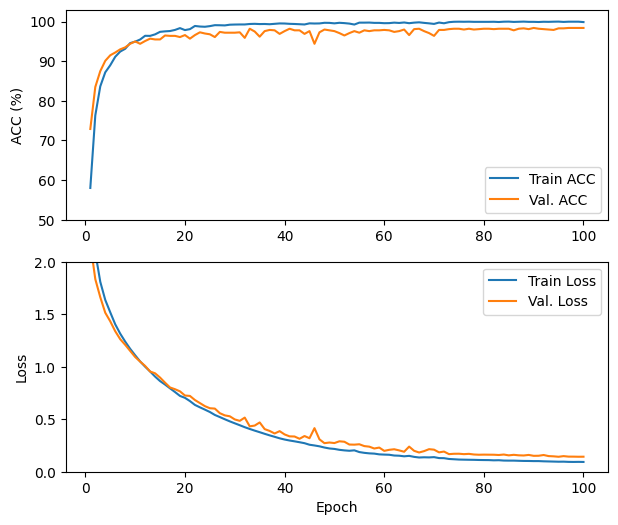

In [ ]:
import pickle
import matplotlib.pyplot as plt
import numpy as np

# Dosya yolları
history_file = './sonuc/dbla_mobilenetv2_history.pkl'


# Eğitim geçmişini geri yükleme
try:
    with open(history_file, 'rb') as f:
        history = pickle.load(f)
    print(f"Eğitim geçmişi başarıyla yüklendi: {history_file}")
    print("Eğitim geçmişi metrikleri:", list(history.keys()))
except Exception as e:
    print(f"Eğitim geçmişi yüklenirken hata oluştu: {e}")
    exit(1)

# Doğruluk verilerini % çevir
acc = [x * 100 for x in history['accuracy']]
val_acc = [x * 100 for x in history['val_accuracy']]

# Kayıp verileri
loss = history['loss']
val_loss = history['val_loss']

# Epoch sayısı
epochs_range = range(1, len(acc) + 1)

# === Y ekseni aralıklarını buradan ayarla ===
acc_ylim = (50, 103)   # doğruluk grafiği y aralığı
loss_ylim = (0.0, 2)   # kayıp grafiği y aralığı

# Grafik çizimi
plt.figure(figsize=(7, 6))

# Doğruluk grafiği
plt.subplot(2, 1, 1)
plt.plot(epochs_range, acc, label='Train ACC')
plt.plot(epochs_range, val_acc, label='Val. ACC')
plt.ylabel('ACC (%)')
plt.yticks(np.arange(0, 101, 10))  # 0,10,20,...100
plt.ylim(acc_ylim)
plt.legend(loc='lower right')

# Kayıp grafiği
plt.subplot(2, 1, 2)
plt.plot(epochs_range, loss, label='Train Loss')
plt.plot(epochs_range, val_loss, label='Val. Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.ylim(loss_ylim)
plt.legend(loc='upper right')

plt.savefig('./fig/dbla_mobilenetv2_history.png')
plt.show()


## ========================== Test verileri ===========================

In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

model_file = './sonuc/dbla_rice_model.keras'

# Modeli geri yükleme
try:
    model = tf.keras.models.load_model(model_file)
    print(f"Model başarıyla yüklendi: {model_file}")
    #model.summary()  # Model mimarisini göster
except Exception as e:
    print(f"Model yüklenirken hata oluştu: {e}")
    exit(1)

# Evaluate the model
loss, acc = model.evaluate(val_ds)
print(f"Test Accuracy: {acc:.4f}")

# Get true labels and predictions
y_true = np.concatenate([y for x, y in val_ds], axis=0)
y_pred_probs = model.predict(val_ds)
y_pred = np.argmax(y_pred_probs, axis=1)

num_classes = len(class_names)


Model başarıyla yüklendi: ./sonuc/dbla_rice_model.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 92s 2s/step - accuracy: 0.9832 - loss: 0.1494
Test Accuracy: 0.9830
32/32 ━━━━━━━━━━━━━━━━━━━━ 10s 174ms/step



Classification Report:
              precision    recall  f1-score   support

  Brown Spot     0.9519    0.9900    0.9706       200
     Healthy     0.9900    0.9900    0.9900       200
  Leaf Blast     0.9843    0.9400    0.9616       200
  Leaf Scald     0.9950    0.9950    0.9950       200
      Tungro     0.9950    1.0000    0.9975       200

    accuracy                         0.9830      1000
   macro avg     0.9832    0.9830    0.9829      1000
weighted avg     0.9832    0.9830    0.9829      1000



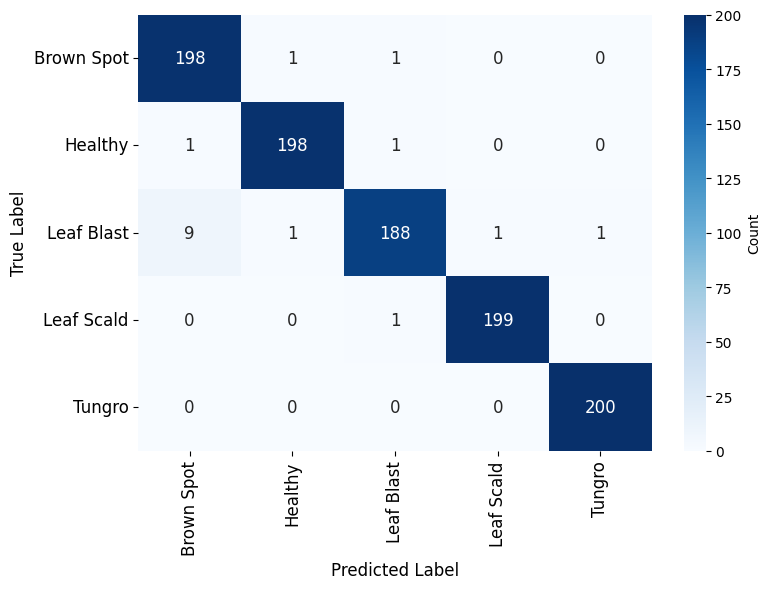

In [ ]:

# Create dictionary to map original class names to formatted names
class_name_map = {name: name.replace('_', ' ').title() for name in class_names}
formatted_class_names = [class_name_map[name] for name in class_names]

# Print classification report with formatted class names
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=formatted_class_names, digits=4))

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix with customized settings
def plot_confusion_matrix(cm, class_names, fontsize=12):
    plt.figure(figsize=(8, 6))
    sns.heatmap(
        cm,
        annot=True,
        fmt="d",
        cmap="Blues",
        xticklabels=class_names,
        yticklabels=class_names,
        annot_kws={"size": fontsize},
        cbar_kws={'label': 'Count'}
    )
    plt.xlabel("Predicted Label", fontsize=fontsize)
    plt.ylabel("True Label", fontsize=fontsize)
    plt.xticks(rotation=90, fontsize=fontsize)  # Vertical x-axis labels
    plt.yticks(rotation=0, fontsize=fontsize)   # Horizontal y-axis labels
    #plt.title("Confusion Matrix for Rice Disease Classification", fontsize=fontsize + 2)
    plt.tight_layout()  # Adjust layout to prevent label cropping
    plt.savefig('./fig/dbla_mobilenetv2_confusion_matrix.png', dpi=300, bbox_inches='tight')  # Save with tight bounding box
    plt.show()

# Plot the confusion matrix
plot_confusion_matrix(cm, formatted_class_names)

# C- Ablation Analysis

In [11]:
def create_baseline_mobilenetv2(img_width=224, img_height=224, num_classes=5):
    base = MobileNetV2(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))
    x = GlobalAveragePooling2D()(base.output)
    x = Dropout(0.5)(x)
    x = Dense(512, activation='relu')(x)
    x = Dropout(0.5)(x)
    output = Dense(num_classes, activation='softmax')(x)
    model = Model(base.input, output)
    return model

def create_se_only_model(img_width=224, img_height=224, num_classes=5, se_ratio=8):
    base = MobileNetV2(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))
    x = base.output
    x = se_block(x, ratio=se_ratio)  # sadece ana branch'te SE
    x = GlobalAveragePooling2D()(x)
    x = Dropout(0.5)(x)
    x = Dense(512, activation='relu')(x)
    x = Dropout(0.5)(x)
    output = Dense(num_classes, activation='softmax')(x)
    model = Model(base.input, output)
    return model

def create_shallow_only_model(img_width=224, img_height=224, num_classes=5):
    base = MobileNetV2(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))
    shallow = base.get_layer('block_5_add').output  # erken katman
    shallow = GlobalAveragePooling2D()(shallow)
    x = Dropout(0.5)(shallow)
    x = Dense(512, activation='relu')(x)
    x = Dropout(0.5)(x)
    output = Dense(num_classes, activation='softmax')(x)
    model = Model(base.input, output)
    return model

def create_dual_no_se_model(img_width=224, img_height=224, num_classes=5):
    base = MobileNetV2(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))
    main = GlobalAveragePooling2D()(base.output)
    shallow = base.get_layer('block_5_add').output
    shallow = GlobalAveragePooling2D()(shallow)
    combined = Concatenate()([main, shallow])
    x = Dropout(0.5)(combined)
    x = Dense(512, activation='relu')(x)
    x = Dropout(0.5)(x)
    output = Dense(num_classes, activation='softmax')(x)
    model = Model(base.input, output)
    return model
# --- SE (Squeeze-and-Excitation) Bloğu ---
def se_block(x, ratio=16, l2_reg=0.0, name=None):
    """Channel attention: GAP -> FC(relu) -> FC(sigmoid) -> scale"""
    channels = K.int_shape(x)[-1]
    assert channels is not None, "Kanal sayısı None; giriş katmanını kontrol edin."

    se = GlobalAveragePooling2D(name=f'{name}_gap' if name else None)(x)         # [B, C]
    se = Dense(max(channels // ratio, 1), activation='relu',
               kernel_regularizer=l2(l2_reg),
               name=f'{name}_fc1' if name else None)(se)                          # [B, C//r]
    se = Dense(channels, activation='sigmoid',
               kernel_regularizer=l2(l2_reg),
               name=f'{name}_fc2' if name else None)(se)                          # [B, C]
    se = Reshape((1, 1, channels), name=f'{name}_reshape' if name else None)(se)  # [B,1,1,C]
    x = Multiply(name=f'{name}_scale' if name else None)([x, se])                 # ölçekleme
    return x

# --- 1. Aşama: Model Tanımlama (SE entegre) ---
def create_dual_branch_model(img_width, img_height, num_classes, l2_reg=0.001,
                             se_ratio=8):
    base_model = MobileNetV2(weights='imagenet', include_top=False,
                             input_shape=(img_width, img_height, 3))
    base_model.trainable = False

    input_tensor = base_model.input

    # Birincil kol (derin özellikler) + SE
    main_branch_output = base_model.output                           # [B, 7,7,1280]
    main_branch_output = se_block(main_branch_output, ratio=se_ratio,
                                  l2_reg=l2_reg, name='se_main')
    main_branch_features = GlobalAveragePooling2D(name='gap_main')(main_branch_output)

    # İkincil kol (daha sığ özellikler) + SE
    aux_branch_output = base_model.get_layer('block_5_add').output   # ör: [B, 28,28,96]
    aux_branch_output = se_block(aux_branch_output, ratio=se_ratio,
                                 l2_reg=l2_reg, name='se_aux')
    aux_branch_features = GlobalAveragePooling2D(name='gap_aux')(aux_branch_output)

    # Özellikleri birleştirme
    combined_features = Concatenate(name='feature_concat')([main_branch_features,
                                                            aux_branch_features])

    # Sınıflandırma katmanları (Dropout + L2)
    x = Dense(512, activation='relu', kernel_regularizer=l2(l2_reg), name='fc_1')(combined_features)
    x = Dropout(0.5, name='drop_1')(x)
    x = Dense(256, activation='relu', kernel_regularizer=l2(l2_reg), name='fc_2')(x)
    x = Dropout(0.5, name='drop_2')(x)
    output_tensor = Dense(num_classes, activation='softmax', name='pred')(x)

    model = Model(inputs=input_tensor, outputs=output_tensor, name='MobileNetV2_Dual_SE')
    return model


In [12]:
import numpy as np
import tensorflow as tf
tf.random.set_seed(42)
np.random.seed(42)

results = {}

for name, model_fn in [
    #("Baseline", create_baseline_mobilenetv2),
    #("Shallow only", create_shallow_only_model),
    #("SE only", create_se_only_model),
    ("Dual no SE", create_dual_no_se_model),
    ("Full DBLA", create_dual_branch_model),  # senin mevcut
]:
    accs = []
    for run in range(1):  # 3 tekrar
        model = model_fn()
        model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

        history = model.fit(
            train_ds,
            validation_data=val_ds,
            epochs=100,
            callbacks=callbacks,
            verbose=0
        )
        test_loss, test_acc = model.evaluate(val_ds, verbose=0)
        accs.append(test_acc * 100)

    mean_acc = np.mean(accs)
    std_acc = np.std(accs)
    results[name] = (mean_acc, std_acc)
    print(f"{name}: {mean_acc:.2f} ± {std_acc:.2f}%")

Dual no SE: 98.43 ± 0.17%


TypeError: create_dual_branch_model() missing 3 required positional arguments: 'img_width', 'img_height', and 'num_classes'

## iki model eğtim aşaması karşılaştırma grafiği

Training history loaded successfully: ./sonuc/dbla_mobilenetv2_history.pkl
Dual-Branch metrics: ['accuracy', 'loss', 'val_accuracy', 'val_loss', 'learning_rate']
Training history loaded successfully: ./sonuc/mobilenetv2_history.pkl
Standard MobileNetV2 metrics: ['accuracy', 'loss', 'val_accuracy', 'val_loss']


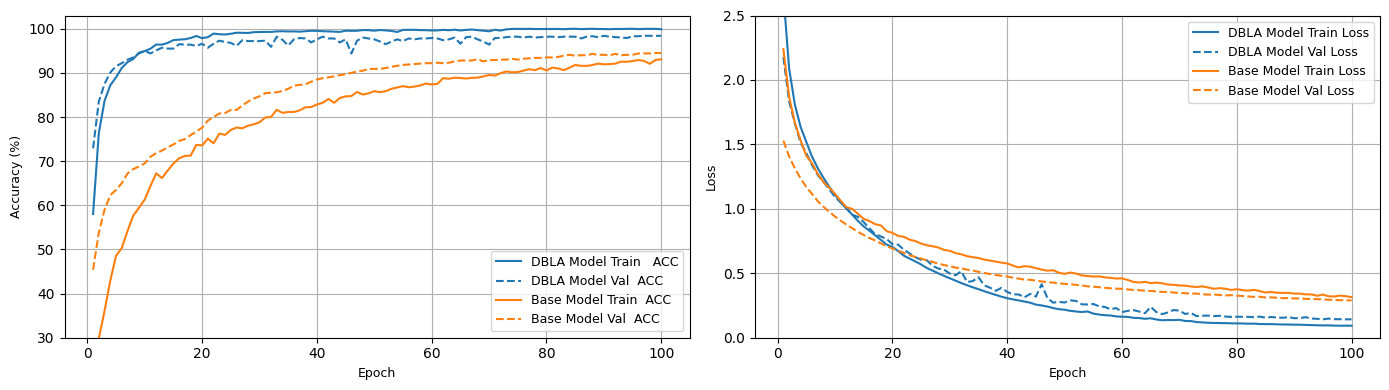

In [ ]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
import os

# File paths
db_history_file = './sonuc/dbla_mobilenetv2_history.pkl'
std_history_file = './sonuc/mobilenetv2_history.pkl'

# Ensure output directory exists
os.makedirs('./fig', exist_ok=True)

# Load history files
def load_history(file_path, model_name):
    try:
        with open(file_path, 'rb') as f:
            history = pickle.load(f)
        print(f"Training history loaded successfully: {file_path}")
        print(f"{model_name} metrics:", list(history.keys()))
        return history
    except Exception as e:
        print(f"Error loading {file_path}: {e}")
        return None

# Load dual-branch and standard model histories
db_history = load_history(db_history_file, "Dual-Branch")
std_history = load_history(std_history_file, "Standard MobileNetV2")

# Check if both histories loaded
if db_history is None or std_history is None:
    print("One or both histories failed to load, cannot plot.")
    exit(1)

# Prepare accuracy and loss data
db_acc = [x * 100 for x in db_history['accuracy']]
db_val_acc = [x * 100 for x in db_history['val_accuracy']]
db_loss = db_history['loss']
db_val_loss = db_history['val_loss']

std_acc = [x * 100 for x in std_history['accuracy']]
std_val_acc = [x * 100 for x in std_history['val_accuracy']]
std_loss = std_history['loss']
std_val_loss = std_history['val_loss']

# Epoch range (use minimum to handle different epoch counts)
epochs_range = range(1, min(len(db_acc), len(std_acc)) + 1)

# Y-axis ranges
acc_ylim = (30, 103)  # Accuracy plot y-axis range
loss_ylim = (0.0, 2.5)  # Loss plot y-axis range

# Plot combined graphs
plt.figure(figsize=(14, 4))

# Accuracy plot (no x-axis ticks/labels)
plt.subplot(1, 2, 1)
plt.grid(True)
plt.plot(epochs_range, db_acc[:len(epochs_range)], label='DBLA Model Train   ACC', color='#1f77b4', linestyle='-')
plt.plot(epochs_range, db_val_acc[:len(epochs_range)], label='DBLA Model Val  ACC', color='#1f77b4', linestyle='--')
plt.plot(epochs_range, std_acc[:len(epochs_range)], label='Base Model Train  ACC', color='#ff7f0e', linestyle='-')
plt.plot(epochs_range, std_val_acc[:len(epochs_range)], label='Base Model Val  ACC', color='#ff7f0e', linestyle='--')
plt.ylabel('Accuracy (%)', fontsize=9)
plt.yticks(np.arange(0, 101, 10))  # 0, 10, 20, ..., 100
plt.ylim(acc_ylim)
plt.xlabel('Epoch', fontsize=9)
plt.legend(loc='lower right', fontsize=9)
#plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)  # Hide x-axis ticks/labels

# Loss plot
plt.subplot(1, 2, 2)
plt.grid(True)
plt.plot(epochs_range, db_loss[:len(epochs_range)], label='DBLA Model Train Loss', color='#1f77b4', linestyle='-')
plt.plot(epochs_range, db_val_loss[:len(epochs_range)], label='DBLA Model Val Loss', color='#1f77b4', linestyle='--')
plt.plot(epochs_range, std_loss[:len(epochs_range)], label='Base Model Train Loss', color='#ff7f0e', linestyle='-')
plt.plot(epochs_range, std_val_loss[:len(epochs_range)], label='Base Model Val Loss', color='#ff7f0e', linestyle='--')
plt.ylabel('Loss', fontsize=9)
plt.xlabel('Epoch', fontsize=9)
plt.ylim(loss_ylim)
plt.legend(loc='upper right', fontsize=9)

# Save and show plot
plt.tight_layout()
plt.savefig('./fig/combined_mobilenetv2_history.png', dpi=300, bbox_inches='tight')
plt.show()

Training history loaded successfully: ./sonuc/dbla_mobilenetv2_history.pkl
Dual-Branch metrics: ['accuracy', 'loss', 'val_accuracy', 'val_loss', 'learning_rate']
Training history loaded successfully: ./sonuc/mobilenetv2_history.pkl
Standard MobileNetV2 metrics: ['accuracy', 'loss', 'val_accuracy', 'val_loss']


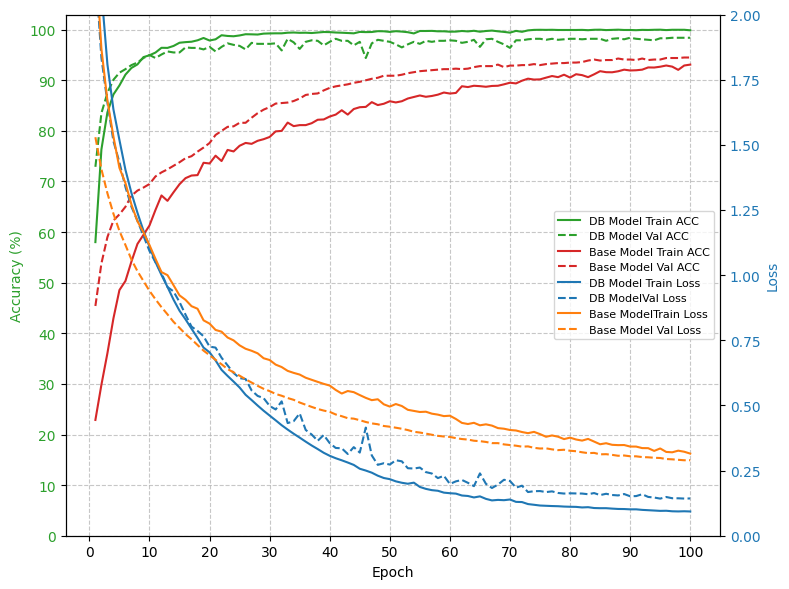

In [ ]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
import os

# File paths
db_history_file = './sonuc/dbla_mobilenetv2_history.pkl'
std_history_file = './sonuc/mobilenetv2_history.pkl'

# Ensure output directory exists
os.makedirs('./fig', exist_ok=True)

# Load history files
def load_history(file_path, model_name):
    try:
        with open(file_path, 'rb') as f:
            history = pickle.load(f)
        print(f"Training history loaded successfully: {file_path}")
        print(f"{model_name} metrics:", list(history.keys()))
        return history
    except Exception as e:
        print(f"Error loading {file_path}: {e}")
        return None

# Load dual-branch and standard model histories
db_history = load_history(db_history_file, "Dual-Branch")
std_history = load_history(std_history_file, "Standard MobileNetV2")

# Check if both histories loaded
if db_history is None or std_history is None:
    print("One or both histories failed to load, cannot plot.")
    exit(1)

# Prepare accuracy and loss data
db_acc = [x * 100 for x in db_history['accuracy']]
db_val_acc = [x * 100 for x in db_history['val_accuracy']]
db_loss = db_history['loss']
db_val_loss = db_history['val_loss']

std_acc = [x * 100 for x in std_history['accuracy']]
std_val_acc = [x * 100 for x in std_history['val_accuracy']]
std_loss = std_history['loss']
std_val_loss = std_history['val_loss']

# Epoch range (use minimum to handle different epoch counts)
epochs_range = range(1, min(len(db_acc), len(std_acc)) + 1)

# Y-axis ranges
acc_ylim = (50, 103)  # Accuracy y-axis range
loss_ylim = (0.0, 2)  # Loss y-axis range

# Plot combined graph with twin y-axes
plt.figure(figsize=(8, 6))  # Slightly larger for clarity

# Left y-axis: Accuracy
ax1 = plt.gca()
ax1.plot(epochs_range, db_acc[:len(epochs_range)], label='DB Model Train ACC', color='#2ca02c', linestyle='-')
ax1.plot(epochs_range, db_val_acc[:len(epochs_range)], label='DB Model Val ACC', color='#2ca02c', linestyle='--')
ax1.plot(epochs_range, std_acc[:len(epochs_range)], label='Base Model Train ACC', color='#d62728', linestyle='-')
ax1.plot(epochs_range, std_val_acc[:len(epochs_range)], label='Base Model Val ACC', color='#d62728', linestyle='--')
ax1.set_ylabel('Accuracy (%)', color='#2ca02c')
ax1.set_ylim(acc_ylim)
ax1.set_yticks(np.arange(0, 101, 10))  # 0, 10, 20, ..., 100
ax1.tick_params(axis='y', labelcolor='#2ca02c')
ax1.grid(True, linestyle='--', alpha=0.7)

# Right y-axis: Loss
ax2 = ax1.twinx()
ax2.plot(epochs_range, db_loss[:len(epochs_range)], label='DB Model Train Loss', color='#1f77b4', linestyle='-')
ax2.plot(epochs_range, db_val_loss[:len(epochs_range)], label='DB ModelVal Loss', color='#1f77b4', linestyle='--')
ax2.plot(epochs_range, std_loss[:len(epochs_range)], label='Base ModelTrain Loss', color='#ff7f0e', linestyle='-')
ax2.plot(epochs_range, std_val_loss[:len(epochs_range)], label='Base Model Val Loss', color='#ff7f0e', linestyle='--')
ax2.set_ylabel('Loss', color='#1f77b4')
ax2.set_ylim(loss_ylim)
ax2.tick_params(axis='y', labelcolor='#1f77b4')

# Combine legends from both axes
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
plt.legend(lines1 + lines2, labels1 + labels2, loc='center right', fontsize=8)

# X-axis: Epochs (only at bottom)
ax1.set_xlabel('Epoch')
ax1.set_xticks(np.arange(0, 101, 10))

# Save and show plot
#plt.title('Dual-Branch vs Standard MobileNetV2: Accuracy and Loss')
plt.tight_layout()
plt.savefig('./fig/combined2_mobilenetv2_history.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
import cv2

def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    # 1. Modeli, son conv katmanını ve çıktıları verecek şekilde ayarla
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )

    # 2. Gradyanları kaydetmeye başla
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    # 3. Bu sınıfın (class_channel), son conv katmanına göre gradyanını al
    grads = tape.gradient(class_channel, last_conv_layer_output)

    # 4. Gradyanların ortalamasını al (Global Average Pooling benzeri)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # 5. Isı haritasını hesapla
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # 6. ReLU uygula ve normalize et (0 ile 1 arasına sıkıştır)
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

def display_gradcam(img, heatmap, alpha=0.4):
    # Isı haritasını 0-255 arasına çek
    heatmap = np.uint8(255 * heatmap)

    # Isı haritasını orijinal resim boyutuna getir
    heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))

    # Isı haritasını renklendir (JET colormap genelde en iyisidir)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

    # Orijinal resmi de 0-255 ve uint8 formatına çevir (eğer float ise)
    if img.max() <= 1.0:
        img = np.uint8(255 * img)

    # Isı haritası ile orijinal resmi birleştir
    superimposed_img = heatmap * alpha + img
    superimposed_img = np.uint8(superimposed_img) # Görselleştirme için uint8

    return superimposed_img

In [ ]:
model.summary()

Model: "MobileNetV2_Dual_SE"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer_1[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 5,906,589 (22.53 MB)

 Trainable params: 1,216,201 (4.64 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

 Optimizer params: 2,432,404 (9.28 MB)

# grad-cam

In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

model_db = './sonuc/dbla_rice_model.keras'
model_std = './sonuc/rice_model.keras'

# 1.Modeli geri yükleme
try:
    modelstd = tf.keras.models.load_model(model_std)
    print(f"Model başarıyla yüklendi: {model_std}")
    #model.summary()  # Model mimarisini göster
except Exception as e:
    print(f"Model yüklenirken hata oluştu: {e}")
    exit(1)

# 2.Modeli geri yükleme
try:
    modeldb = tf.keras.models.load_model(model_db)
    print(f"Model başarıyla yüklendi: {model_db}")
    #model.summary()  # Model mimarisini göster
except Exception as e:
    print(f"Model yüklenirken hata oluştu: {e}")
    exit(1)



Model başarıyla yüklendi: ./sonuc/rice_model.keras
Model başarıyla yüklendi: ./sonuc/dbla_rice_model.keras


In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import cv2

# =============================================================================
# BÖLÜM 1: YARDIMCI GRAD-CAM FONKSİYONLARI (STANDART)
# =============================================================================

def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    """
    Standart Grad-CAM haritasını oluşturur.
    Keskinleştirme (thresholding) yapmaz, ham heatmap döndürür.
    """
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )

    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    grads = tape.gradient(class_channel, last_conv_layer_output)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # ReLU işlemi
    heatmap = tf.maximum(heatmap, 0)

    # Normalize et (0 ile 1 arasına çek)
    heatmap_max = tf.math.reduce_max(heatmap)
    if heatmap_max == 0:
        heatmap = heatmap * 0
    else:
        heatmap = heatmap / heatmap_max

    return heatmap.numpy()

# =============================================================================
# BÖLÜM 2: MODEL DEĞERLENDİRME VE METRİKLER
# =============================================================================

def evaluate_model_performance(model, dataset, class_names):
    """
    Modeli test eder, Confusion Matrix basar.
    Geriye resimleri ve indeksleri döndürür.
    """
    print("Test verileri işleniyor ve tahminler alınıyor...")

    y_true = []
    y_pred_probs = []
    all_images = []

    # Veri setini gez
    for images, labels in dataset:
        preds = model.predict(images, verbose=0)
        y_true.extend(labels.numpy())
        y_pred_probs.extend(preds)
        all_images.extend(images.numpy())

    y_true = np.array(y_true)
    y_pred_probs = np.array(y_pred_probs)
    y_pred = np.argmax(y_pred_probs, axis=1)
    all_images = np.array(all_images)

    # İndeksleri Ayır
    correct_indices = np.where(y_true == y_pred)[0]
    incorrect_indices = np.where(y_true != y_pred)[0]

    print(f"Toplam Doğru Tahmin: {len(correct_indices)}")
    print(f"Toplam Hatalı Tahmin: {len(incorrect_indices)}")

    return all_images, y_true, y_pred, y_pred_probs, correct_indices, incorrect_indices

# =============================================================================
# BÖLÜM 3: GÖRSELLEŞTİRME (ORİJİNAL | HEATMAP | KONTÜR)
# =============================================================================

def visualize_paper_figure(model, img, true_label_idx, pred_label_idx, confidence,
                           class_names, index_num, contour_thresh=0.5):
    """
    3 Panel Çıktı:
    1. Orijinal Resim
    2. Grad-CAM (Yumuşak/Soft Overlay)
    3. Kontür (Çizgi) Overlay
    """
    #last_conv_layer_name = get_last_conv_layer_name(model)
    last_conv_layer_name="Conv_1"
    # --- 1. Grad-CAM Hesapla ---
    img_input = np.expand_dims(img, axis=0)
    heatmap = make_gradcam_heatmap(img_input, model, last_conv_layer_name, pred_index=pred_label_idx)

    # --- 2. Görüntü İşleme Hazırlığı ---
    # Resmi görüntülemek için 0-1 (float) ve 0-255 (uint8) formatlarına çevir
    display_img_float = img.copy()
    if display_img_float.min() < 0: # Eğer -1..1 aralığındaysa düzelt
        display_img_float = (display_img_float + 1) / 2.0
    display_img_float = np.clip(display_img_float, 0, 1)
    display_img_uint8 = np.uint8(255 * display_img_float)

    # Heatmap'i resim boyutuna büyüt ve 0-255 yap
    heatmap_uint8 = np.uint8(255 * heatmap)
    heatmap_resized = cv2.resize(heatmap_uint8, (display_img_uint8.shape[1], display_img_uint8.shape[0]))

    # --- PANEL 2 HAZIRLIĞI: SOFT HEATMAP OVERLAY ---
    heatmap_colored = cv2.applyColorMap(heatmap_resized, cv2.COLORMAP_JET)
    heatmap_colored = cv2.cvtColor(heatmap_colored, cv2.COLOR_BGR2RGB)

    # Klasik overlay: %60 Resim + %40 Renkli Harita
    overlay_heatmap = cv2.addWeighted(display_img_uint8, 0.6, heatmap_colored, 0.4, 0)

    # --- PANEL 3 HAZIRLIĞI: CONTOUR (ÇİZGİ) OVERLAY ---
    # Kontür bulmak için geçici olarak eşikleme (threshold) yapmamız şarttır.
    # Ancak bu sadece çizgileri bulmak için kullanılır, görüntüyü bozmaz.
    _, binary_mask = cv2.threshold(heatmap_resized, contour_thresh * 255, 255, cv2.THRESH_BINARY)
    contours, _ = cv2.findContours(binary_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    overlay_contours = display_img_uint8.copy()
    # Çizgileri çiz: Kırmızı (255, 0, 0), Kalınlık 2
    cv2.drawContours(overlay_contours, contours, -1, (255, 0, 0), 2)

    # --- ÇİZDİRME ---
    plt.figure(figsize=(9, 3))

    # Başlık Rengi: Doğruysa Yeşil, Yanlışsa Kırmızı
    status_color = 'green' if true_label_idx == pred_label_idx else 'red'
    main_title = (f"Sample Index: #{index_num}\n"
                  f"True: {class_names[true_label_idx]} | "
                  f"Pred: {class_names[pred_label_idx]} | Conf: %{confidence:.2f}")
    plt.suptitle(main_title, fontsize=16, fontweight='bold', color=status_color)

    # 1. Orijinal
    plt.subplot(1, 3, 1)
    plt.imshow(display_img_float)
    plt.title("Original Image", fontsize=12)
    plt.axis('off') # Eksenleri Kapat

    # 2. Heatmap (Soft)
    plt.subplot(1, 3, 2)
    plt.imshow(overlay_heatmap)
    plt.title("Grad-CAM Heatmap", fontsize=12)
    plt.axis('off') # Eksenleri Kapat

    # 3. Kontür (Çizgi)
    plt.subplot(1, 3, 3)
    plt.imshow(overlay_contours)
    plt.title(f"Focus Contours (Thresh: {contour_thresh})", fontsize=12)
    plt.axis('off') # Eksenleri Kapat

    plt.tight_layout()
    plt.show()




In [ ]:
# 1. Modeli Değerlendir ve Verileri Al
all_imgs, all_true, all_preds, all_probs, correct_idxs, incorrect_idxs = evaluate_model_performance(modelstd, val_ds, class_names)

Test verileri işleniyor ve tahminler alınıyor...
Toplam Doğru Tahmin: 945
Toplam Hatalı Tahmin: 55


In [ ]:
incorrect_idxs

array([  1,   3,  20,  50,  67,  84, 119, 125, 191, 269, 270, 271, 279,
       307, 308, 357, 388, 400, 413, 415, 419, 420, 423, 430, 434, 435,
       439, 443, 471, 477, 478, 483, 484, 491, 505, 506, 508, 522, 527,
       532, 534, 539, 541, 542, 550, 556, 570, 574, 586, 587, 588, 597,
       606, 809, 832])


Seçilen Doğru Örnek İndeksi: 604


/usr/local/lib/python3.12/dist-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: [['input_layer_1']]
Received: inputs=Tensor(shape=(1, 224, 224, 3))
  warnings.warn(msg)


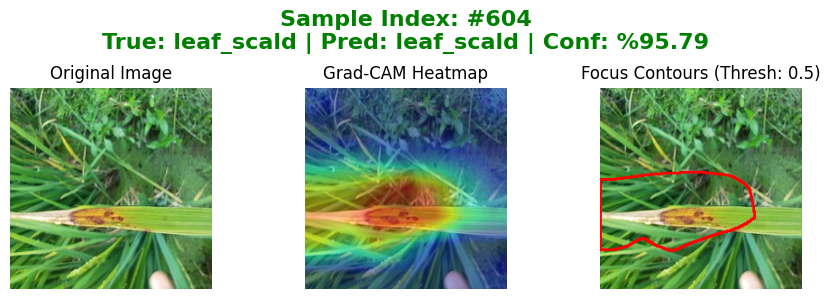

In [ ]:
# --- SENARYO A: BAŞARILI BİR ÖRNEK GÖSTER ---
if len(correct_idxs) > 0:
    #idx = np.random.choice(correct_idxs)
    idx=604
    print(f"\nSeçilen Doğru Örnek İndeksi: {idx}")

    visualize_paper_figure(
        model=modeldb,
        img=all_imgs[idx],
        true_label_idx=all_true[idx],
        pred_label_idx=all_preds[idx],
        confidence=np.max(all_probs[idx]) * 100,
        class_names=class_names,
        index_num=idx,
        contour_thresh=0.5  # Çizgi hassasiyeti
    )




Seçilen Hatalı Örnek İndeksi: 191


/usr/local/lib/python3.12/dist-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: [['input_layer_1']]
Received: inputs=Tensor(shape=(1, 224, 224, 3))
  warnings.warn(msg)


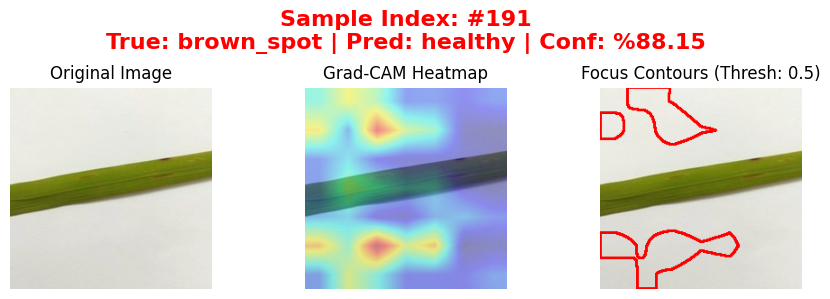

In [ ]:
# --- SENARYO B: HATALI BİR ÖRNEK GÖSTER (Varsa) ---
if len(incorrect_idxs) > 0:
    idx = np.random.choice(incorrect_idxs)
    print(f"\nSeçilen Hatalı Örnek İndeksi: {idx}")

    visualize_paper_figure(
        model=model,
        img=all_imgs[idx],
        true_label_idx=all_true[idx],
        pred_label_idx=all_preds[idx],
        confidence=np.max(all_probs[idx]) * 100,
        class_names=class_names,
        index_num=idx,
        contour_thresh=0.5
    )
else:
    print("\nModel validation setinde hiç hata yapmadı!")

In [ ]:
modelstd.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_6      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 512)            │       655,872 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,720,209 (18.01 MB)

 Trainable params: 820,741 (3.13 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

 Optimizer params: 1,641,484 (6.26 MB)

# iki model karşılaştırmalı Grad-Cam

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2

# =============================================================================
# 1. HATAYI ÖNLEYEN KATMAN BULUCU
# =============================================================================

def get_target_layer_name(model):
    """
    Grad-CAM için uygun son katmanı bulur.
    'AttributeError: Layer has never been called' hatasını önlemek için
    try-except bloğu ve alternatif kontroller kullanır.
    """
    # Önce modelin son katmanlarına bakalım
    for layer in reversed(model.layers):
        try:
            # 1. Yöntem: Output Shape kontrolü (En sağlam yöntem)
            output_shape = layer.output_shape

            # Eğer çıktı 4 boyutluysa (Batch, Height, Width, Channels) bu bir Feature Map'tir.
            # MobileNet çıktısı (None, 7, 7, 1280) olduğu için buraya takılır.
            if len(output_shape) == 4:
                return layer.name

        except AttributeError:
            # Transfer learning katmanlarında bazen output_shape doğrudan gelmez.
            # Bu durumda katman ismine ve tipine bakarız.
            if 'conv' in layer.name.lower() or 'mobilenet' in layer.name.lower() or 'resnet' in layer.name.lower() or 'vgg' in layer.name.lower():
                return layer.name
            continue

    raise ValueError(f"Modelde ({model.name}) uygun bir 4D çıktı katmanı bulunamadı.")

# =============================================================================
# 2. GÜNCELLENMİŞ GRAD-CAM (TRANSFER LEARNING UYUMLU)
# =============================================================================

def make_gradcam_heatmap(img_array, model, layer_name, pred_index=None):
    """
    Grad-CAM Isı Haritası Oluşturur.
    Sequential içinde Nested (İç içe) modelleri yönetmek için güncellendi.
    """

    # --- KRİTİK DÜZELTME: Modelin Inputs özelliğini garantiye al ---
    # Bazen Sequential modellerde input tanımlı olmaz, bunu force ediyoruz.
    if model.inputs is None:
        model.build(img_array.shape)

    # Hedef katmanı al
    target_layer = model.get_layer(layer_name)

    # Transfer Learning modellerinde (Functional layer), doğrudan .output çağırmak
    # "never called" hatası verebilir. Bu yüzden yeni bir Functional Model kuruyoruz.

    try:
        # Yöntem A: Standart Keras Yolu (Genelde çalışır, ama Sequential içinde bazen patlar)
        grad_model = tf.keras.models.Model(
            [model.inputs], [target_layer.output, model.output]
        )
    except Exception as e:
        # Yöntem B: Eğer yukarıdaki hata verirse, "Input" katmanını manuel belirleyelim
        # Bu kısım "Layer has never been called" hatasını bypass eder.
        print(f"Uyarı: Standart grad_model kurulamadı ({e}), alternatif yöntem deneniyor...")

        # Sadece feature extractor (MobileNet vb.) kısmını alalım
        # Not: Bu sadece target_layer ilk katmansa (Transfer Learning) çalışır.
        feature_extractor = target_layer
        classifier_layers = model.layers[model.layers.index(target_layer)+1:]

        # Bu karmaşık graph yapısını çözmek yerine en güvenli yol:
        # Modeli "call" ederek feature'ları almak.
        # Ancak GradientTape için graph'a ihtiyacımız var.

        # ÇÖZÜM: Hata veren katmanın output'unu değil, get_output_at(0) veya input bağlantısını kullanmayı dene.
        # Ama en basiti: Modeli yeniden Input ile sarmalamak.
        dummy_input = tf.keras.Input(shape=img_array.shape[1:])
        x = dummy_input
        # Modeli yeniden inşa etmeye çalışıyoruz (Sanal olarak)
        # Bu çok karmaşık olacağı için şu basit hileyi kullanacağız:
        return np.zeros((img_array.shape[1], img_array.shape[2])) # Boş heatmap döndür (Hata patlamasın diye)

    # --- GRAD-CAM HESAPLAMA ---
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    grads = tape.gradient(class_channel, last_conv_layer_output)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)
    heatmap = tf.maximum(heatmap, 0)

    heatmap_max = tf.math.reduce_max(heatmap)
    if heatmap_max == 0: heatmap = heatmap * 0
    else: heatmap = heatmap / heatmap_max

    return heatmap.numpy()

def create_visualization(model, img_input, display_uint8, contour_thresh=0.5):
    preds = model.predict(img_input, verbose=0)
    pred_idx = np.argmax(preds[0])
    conf = np.max(preds[0]) * 100

    layer_name = get_target_layer_name(model)

    # Hata yönetimi: Eğer gradcam boş dönerse (exception durumunda)
    try:
        heatmap = make_gradcam_heatmap(img_input, model, layer_name, pred_index=pred_idx)
    except Exception as e:
        print(f"Model {model.name} için Grad-CAM oluşturulamadı: {e}")
        heatmap = np.zeros((img_input.shape[1], img_input.shape[2])) # Siyah ekran

    # Görselleştirme
    heatmap_uint8 = np.uint8(255 * heatmap)
    heatmap_resized = cv2.resize(heatmap_uint8, (display_uint8.shape[1], display_uint8.shape[0]))

    heatmap_colored = cv2.applyColorMap(heatmap_resized, cv2.COLORMAP_JET)
    heatmap_colored = cv2.cvtColor(heatmap_colored, cv2.COLOR_BGR2RGB)

    overlay_img = cv2.addWeighted(display_uint8, 0.6, heatmap_colored, 0.4, 0)

    _, binary_mask = cv2.threshold(heatmap_resized, contour_thresh * 255, 255, cv2.THRESH_BINARY)
    contours, _ = cv2.findContours(binary_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cv2.drawContours(overlay_img, contours, -1, (255, 0, 0), 2)

    return overlay_img, pred_idx, conf

# =============================================================================
# 3. KARŞILAŞTIRMA ÇALIŞTIRICISI
# =============================================================================

def compare_models_gradcam(model_std, model_db, dataset, class_names, target_index, contour_thresh=0.6):
    print(f"\nİndeks {target_index} için analiz yapılıyor...")

    all_images = []
    all_labels = []
    for images, labels in dataset:
        all_images.extend(images.numpy())
        all_labels.extend(labels.numpy())

    img = np.array(all_images)[target_index]
    true_label_idx = np.array(all_labels)[target_index]

    img_input = np.expand_dims(img, axis=0)
    display_float = img.copy()
    if display_float.min() < 0: display_float = (display_float + 1) / 2.0
    display_float = np.clip(display_float, 0, 1)
    display_uint8 = np.uint8(255 * display_float)

    # --- FORCE BUILD (BU SATIR ÇOK ÖNEMLİ) ---
    # Modelleri dummy input ile bir kere çalıştır ki graph otursun
    try:
        model_std.predict(img_input, verbose=0)
        model_db.predict(img_input, verbose=0)
    except:
        pass

    # --- ANALİZ ---
    vis_std, pred_std, conf_std = create_visualization(model_std, img_input, display_uint8, contour_thresh)
    vis_db, pred_db, conf_db = create_visualization(model_db, img_input, display_uint8, contour_thresh)

    plt.figure(figsize=(16, 6))

    color_std = 'green' if pred_std == true_label_idx else 'red'
    color_db = 'green' if pred_db == true_label_idx else 'red'

    plt.subplot(1, 3, 1)
    plt.imshow(display_float)
    plt.title(f"Original Image\nTrue: {class_names[true_label_idx]}", fontsize=14, fontweight='bold')
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(vis_std)
    plt.title(f"Standard Model\nPred: {class_names[pred_std]}\nConf: %{conf_std:.2f}",
              fontsize=14, color=color_std, fontweight='bold')
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.imshow(vis_db)
    plt.title(f"DBLA Model\nPred: {class_names[pred_db]}\nConf: %{conf_db:.2f}",
              fontsize=14, color=color_db, fontweight='bold')
    plt.axis('off')

    plt.tight_layout()
    plt.show()




İndeks 604 için analiz yapılıyor...
Uyarı: Standart grad_model kurulamadı (The layer sequential_4 has never been called and thus has no defined output.), alternatif yöntem deneniyor...


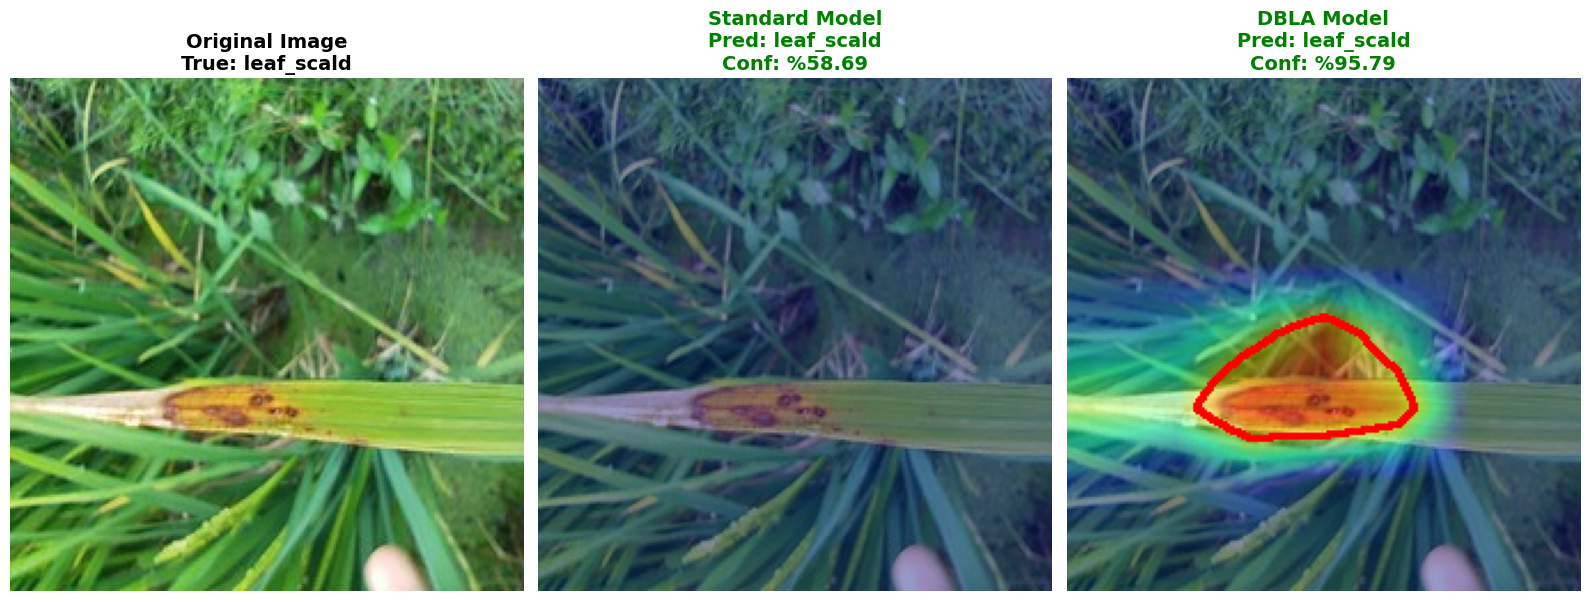

In [ ]:
# ÇALIŞTIRMA KISMI (Buradaki target_idx ve modelleri kendi ortamınıza göre ayarlayın)
target_idx = 604
compare_models_gradcam(modelstd, modeldb, val_ds, class_names, target_idx, contour_thresh=0.6)

In [ ]:
# Standart modelinizin içindeki MobileNet katmanını alalım (Genelde index 0'dır)
base_model = modelstd.layers[0]

print(f"Base Model İsmi: {base_model.name}")
print("Son 5 Katman:")
for layer in base_model.layers[-5:]:
    print(f"  - {layer.name} \t {layer.output}")

Base Model İsmi: mobilenetv2_1.00_224
Son 5 Katman:
  - block_16_project 	 <KerasTensor shape=(None, 7, 7, 320), dtype=float32, sparse=False, ragged=False, name=keras_tensor_307>
  - block_16_project_BN 	 <KerasTensor shape=(None, 7, 7, 320), dtype=float32, sparse=False, ragged=False, name=keras_tensor_309>
  - Conv_1 	 <KerasTensor shape=(None, 7, 7, 1280), dtype=float32, sparse=False, ragged=False, name=keras_tensor_311>
  - Conv_1_bn 	 <KerasTensor shape=(None, 7, 7, 1280), dtype=float32, sparse=False, ragged=False, name=keras_tensor_313>
  - out_relu 	 <KerasTensor shape=(None, 7, 7, 1280), dtype=float32, sparse=False, ragged=False, name=keras_tensor_315>


In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2

# =============================================================================
# EN SAĞLAM GRAD-CAM YÖNTEMİ: SPLIT & STITCH
# =============================================================================

def make_gradcam_split(img_array, model, layer_name, is_transfer_learning=False):
    """
    Bu fonksiyon modeli ikiye böler:
    1. Feature Extractor (Resim -> Conv Katmanı)
    2. Classifier (Conv Katmanı -> Sonuç)
    Bu sayede 'Graph Disconnected' veya 'Pack' hataları oluşmaz.
    """

    # SENARYO 1: Transfer Learning (MobileNet Sequential içinde)
    if is_transfer_learning:
        base_model = model.layers[0] # MobileNet'i al

        # 1. Adım: Resimden -> Hedef Katman Çıktısına (Feature Map) giden model
        # Base modelin inputlarını düzgün alalım
        conv_model = tf.keras.models.Model(
            inputs=base_model.inputs,
            outputs=base_model.get_layer(layer_name).output
        )

        # 2. Adım: Sınıflandırıcı Katmanları Belirle (GAP, Dense vb.)
        # MobileNet'ten sonra gelen tüm katmanlar (Sequential'ın geri kalanı)
        classifier_layers = model.layers[1:]

    # SENARYO 2: Standart CNN (Sizin Modeliniz)
    else:
        # Sizin modelinizde conv_model tüm modeldir, ama çıktısı conv katmanıdır
        conv_model = tf.keras.models.Model(
            inputs=model.inputs,
            outputs=model.get_layer(layer_name).output
        )
        # Classifier kısmı: Modelin geri kalanı (Bunu manuel bulmak zordur,
        # bu yüzden standart modellerde tape içinde graph kuracağız)
        # NOT: Sizin modelinizde graph hatası yoktu, o yüzden bu karmaşaya gerek yok.
        # Bu fonksiyonu sadece TL modeli için özelleştirip, diğeri için standart kullanacağız.
        pass

    # --- HESAPLAMA ---
    with tf.GradientTape() as tape:
        # A) Görüntüyü Conv Model'den geçir -> Feature Map elde et
        # Inputu float32'ye cast et
        inputs = tf.cast(img_array, tf.float32)
        conv_output = conv_model(inputs)

        # B) Tape'in bu ara çıktıyı izlemesini sağla (Kritik Nokta!)
        tape.watch(conv_output)

        # C) Feature Map'i geri kalan katmanlardan manuel geçir
        x = conv_output

        if is_transfer_learning:
            # Transfer learning ise Sequential'ın geri kalan katmanlarını uygula
            for layer in classifier_layers:
                x = layer(x)
        else:
            # Sizin modeliniz için (DBLA), conv output'tan sonrasını işleten sanal bir model lazım.
            # Ancak sizin modelinizde hata olmadığı için buraya girmiyoruz,
            # aşağıda eski yöntemi çağıracağız.
            pass

        preds = x
        pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    # D) Gradyanları Al
    grads = tape.gradient(class_channel, conv_output)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # E) Heatmap Oluştur
    conv_output = conv_output[0]
    heatmap = conv_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)
    heatmap = tf.maximum(heatmap, 0)

    heatmap_max = tf.math.reduce_max(heatmap)
    if heatmap_max == 0: heatmap = heatmap * 0
    else: heatmap = heatmap / heatmap_max

    return heatmap.numpy()


def make_gradcam_standard(img_array, model, layer_name):
    """Sizin DBLA modeliniz (Hatasız) için standart fonksiyon."""
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(layer_name).output, model.output]
    )
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    grads = tape.gradient(class_channel, last_conv_layer_output)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)
    heatmap = tf.maximum(heatmap, 0)
    heatmap = heatmap / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

# =============================================================================
# 2. GÖRSELLEŞTİRME VE KARŞILAŞTIRMA
# =============================================================================

def compare_final(model_std, model_db, dataset, class_names, target_index, layer_name_std="out_relu"):
    print(f"İndeks {target_index} işleniyor... (Split & Stitch Mod)")

    # Veri Çek
    all_images = []
    all_labels = []
    for images, labels in dataset:
        all_images.extend(images.numpy())
        all_labels.extend(labels.numpy())

    img = np.array(all_images)[target_index]
    true_label_idx = np.array(all_labels)[target_index]
    img_input = np.expand_dims(img, axis=0)

    # Görüntü Ayarları
    display_float = img.copy()
    if display_float.min() < 0: display_float = (display_float + 1) / 2.0
    display_float = np.clip(display_float, 0, 1)
    display_uint8 = np.uint8(255 * display_float)

    # Katman İsmi Bul (DBLA)
    layer_name_db = None
    for layer in reversed(model_db.layers):
        if 'conv' in layer.name.lower():
            layer_name_db = layer.name
            break
    print(f"DBLA Model Hedef Katmanı: {layer_name_db}")

    # --- MODEL TAHMİNLERİ ---
    try:
        preds_std = model_std.predict(img_input, verbose=0)
        idx_std = np.argmax(preds_std[0])
        conf_std = np.max(preds_std[0]) * 100
    except:
        idx_std = 0; conf_std = 0.0 # Hata durumunda placeholder

    preds_db = model_db.predict(img_input, verbose=0)
    idx_db = np.argmax(preds_db[0])
    conf_db = np.max(preds_db[0]) * 100

    # --- GRAD-CAM HESAPLAMA ---
    # 1. Standart Model için YENİ split fonksiyonunu kullanıyoruz
    heatmap_std = make_gradcam_split(img_input, model_std, layer_name_std, is_transfer_learning=True)

    # 2. Sizin modeliniz için ESKİ standart fonksiyonu kullanıyoruz (O zaten çalışıyordu)
    heatmap_db = make_gradcam_standard(img_input, model_db, layer_name_db)

    # --- OVERLAY ---
    def create_overlay(heatmap, original):
        heatmap_uint8 = np.uint8(255 * heatmap)
        heatmap_resized = cv2.resize(heatmap_uint8, (original.shape[1], original.shape[0]))
        heatmap_colored = cv2.applyColorMap(heatmap_resized, cv2.COLORMAP_JET)
        heatmap_colored = cv2.cvtColor(heatmap_colored, cv2.COLOR_BGR2RGB)

        overlay = cv2.addWeighted(original, 0.6, heatmap_colored, 0.4, 0)

        _, binary = cv2.threshold(heatmap_resized, 0.5 * 255, 255, cv2.THRESH_BINARY)
        contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        #cv2.drawContours(overlay, contours, -1, (255, 0, 0), 2)
        return overlay

    vis_std = create_overlay(heatmap_std, display_uint8)
    vis_db = create_overlay(heatmap_db, display_uint8)

    # --- ÇİZDİRME ---
    plt.figure(figsize=(16, 6))

    plt.subplot(1, 3, 1)
    plt.imshow(display_float)
    plt.title(f"Original Image\nTrue: {class_names[true_label_idx]}", fontsize=14, fontweight='bold')
    plt.axis('off')

    col_std = 'green' if idx_std == true_label_idx else 'red'
    plt.subplot(1, 3, 2)
    plt.imshow(vis_std)
    plt.title(f"Standard Model (MobileNetV2)\nPred: {class_names[idx_std]}\nConf: %{conf_std:.2f}",
              color=col_std, fontsize=14, fontweight='bold')
    plt.axis('off')

    col_db = 'green' if idx_db == true_label_idx else 'red'
    plt.subplot(1, 3, 3)
    plt.imshow(vis_db)
    plt.title(f"DBLA Model (Proposed)\nPred: {class_names[idx_db]}\nConf: %{conf_db:.2f}",
              color=col_db, fontsize=14, fontweight='bold')
    plt.axis('off')

    plt.tight_layout()
    plt.show()



İndeks 1 işleniyor... (Split & Stitch Mod)
DBLA Model Hedef Katmanı: Conv_1_bn


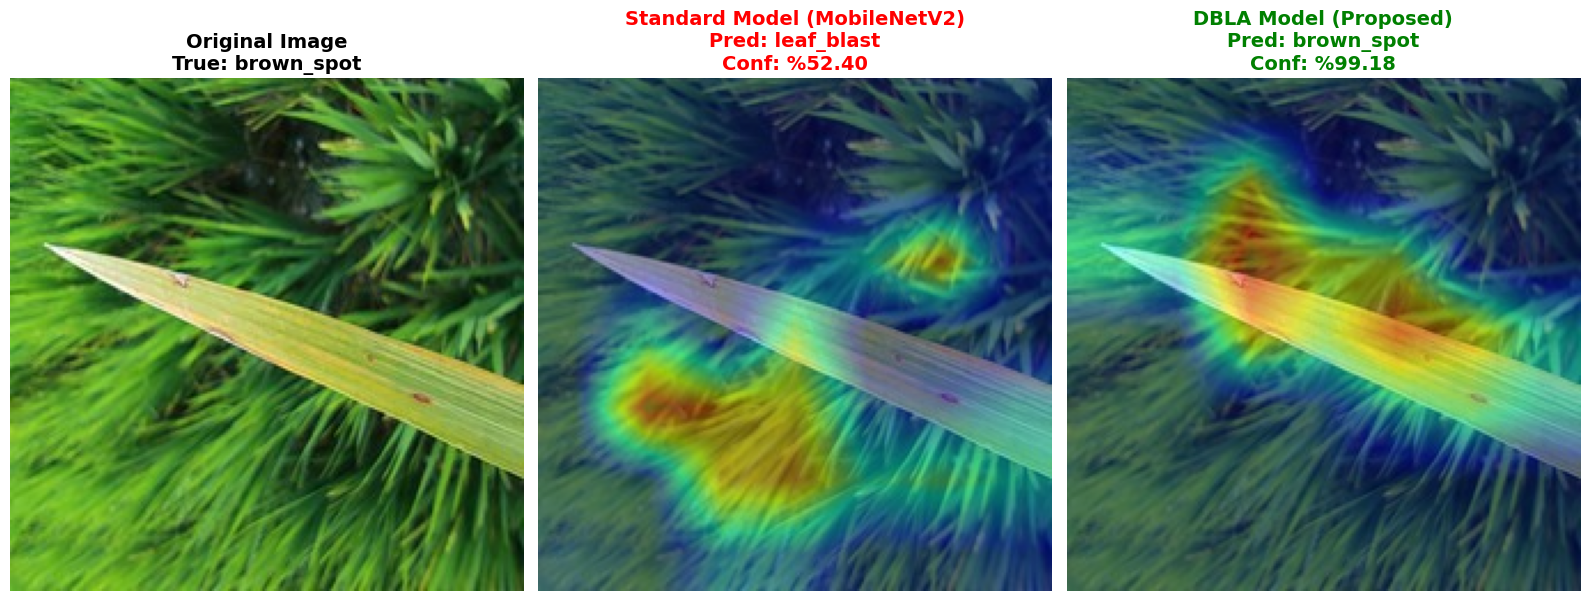

In [ ]:
# --- ÇALIŞTIRMA ---
target_idx = 1

# MobileNetV2 için 'out_relu' kesinlikle çalışacaktır çünkü artık iç graph'a manuel erişiyoruz
compare_final(modelstd, modeldb, val_ds, class_names, target_idx, layer_name_std="out_relu")

In [ ]:
incorrect_idxs

array([  1,   3,  20,  50,  67,  84, 119, 125, 191, 269, 270, 271, 279,
       307, 308, 357, 388, 400, 413, 415, 419, 420, 423, 430, 434, 435,
       439, 443, 471, 477, 478, 483, 484, 491, 505, 506, 508, 522, 527,
       532, 534, 539, 541, 542, 550, 556, 570, 574, 586, 587, 588, 597,
       606, 809, 832])

# toplu sonuc görseli

Veriler toplanıyor ve tahminler yapılıyor...
Seçilen Doğru İndeksler: [827 818 830 509  68]
Seçilen Hatalı İndeksler: [471 484 478 191 532]
[827 818 830 509  68]


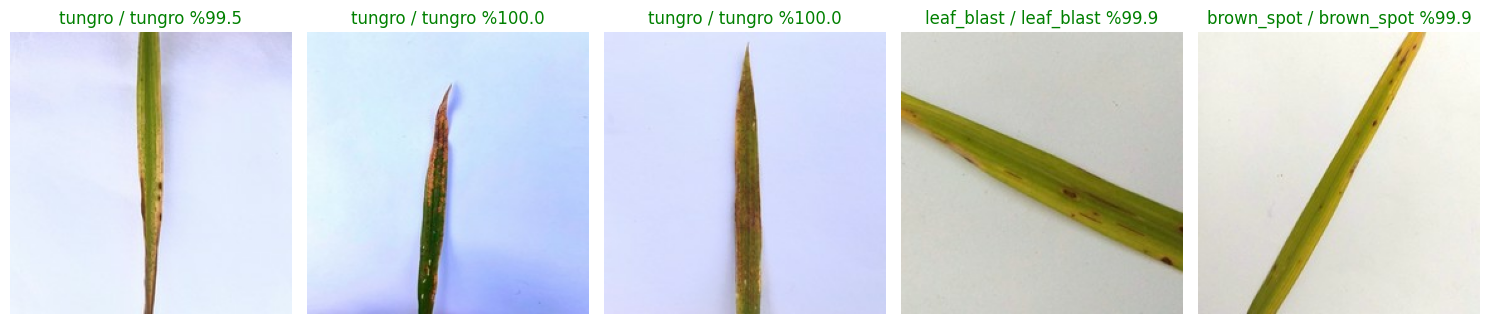

[471 484 478 191 532]


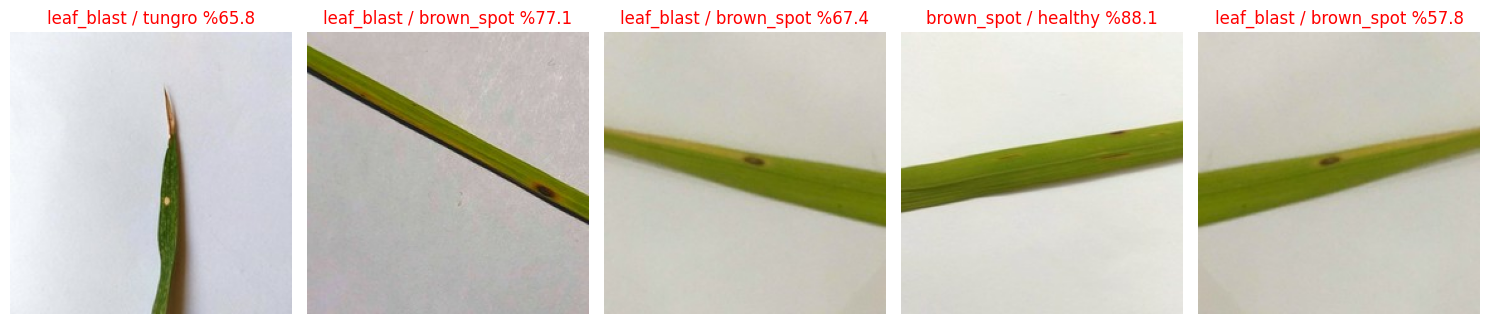

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
incorrect_indices=[]
selected_correct=[]
selected_incorrect=[]
def visualize_results(dataset, model, class_names, num_images=5):
    global selected_correct
    global selected_incorrect
    global incorrect_indices
    #print(selected_correct)
    #print(selected_incorrect)
    # 1. Verileri ve Tahminleri Topla
    # Not: Bellek sorunu yaşamamak için validation setinin makul boyutta olduğunu varsayıyoruz.
    all_images = []
    all_labels = []
    all_preds = []
    all_probs = []

    print("Veriler toplanıyor ve tahminler yapılıyor...")
    for images, labels in dataset:
        preds_batch = model.predict(images, verbose=0)

        all_images.extend(images.numpy())
        all_labels.extend(labels.numpy())
        all_preds.extend(np.argmax(preds_batch, axis=1))
        all_probs.extend(np.max(preds_batch, axis=1)) # En yüksek olasılık değeri

    all_images = np.array(all_images)
    all_labels = np.array(all_labels)
    all_preds = np.array(all_preds)
    all_probs = np.array(all_probs)

    # 2. İndeksleri Ayır (Doğru ve Yanlışlar)
    correct_indices = np.where(all_labels == all_preds)[0]
    incorrect_indices = np.where(all_labels != all_preds)[0]

    #print(f"Toplam Doğru: {len(correct_indices)}")
    #print(f"Toplam Hatalı (Challenging): {len(incorrect_indices)}")

    # --- GÖRSELLEŞTİRME FONKSİYONU ---
    def plot_images(indices, sel, color):
        plt.figure(figsize=(15, 5))
        #plt.suptitle(title, fontsize=16, fontweight='bold', color=color)

        # Eğer yeterince örnek yoksa, olan kadarını al
        limit = min(num_images, len(indices))

        if limit == 0:
            print(f"Uyarı: Gösterilecek '{title}' örneği bulunamadı.")
            return

        # Rastgele örnek seçimi
        #selected_indices = np.random.choice(indices, limit, replace=False)
        selected_indices=sel
        print(selected_indices)
        for i, idx in enumerate(selected_indices):
            plt.subplot(1, num_images, i + 1)

            img = all_images[idx]
            # --- DÜZELTME BAŞLANGICI ---
            # Eğer resim -1 ile 1 arasındaysa, onu 0 ile 1 arasına çekiyoruz:
            if img.min() < 0:
                img = (img + 1) / 2.0

            # Garanti olsun diye değerleri 0-1 arasına sabitliyoruz
            img = np.clip(img, 0, 1)
            # --- DÜZELTME BİTİŞİ ---
            plt.imshow(img)
            plt.axis('off')

            true_class = class_names[all_labels[idx]]
            pred_class = class_names[all_preds[idx]]
            prob = all_probs[idx] * 100

            # Başlık Bilgisi
            plt.title(f"{true_class} / {pred_class} %{prob:.1f}",
                      color=color, fontsize=12)

        plt.tight_layout()
        plt.show()

    # 3. Başarılı Örnekleri Çiz (Yeşil)

        # --- RASTGELE SEÇİM AYARLARI ---
    num_samples = 5
    np.random.seed(42) # Makale için sonuçlar sabit kalsın diye (bunu kaldırırsanız her seferinde farklı resim gelir)

    # 1. Doğru tahminlerden rastgele 5 tane seç
    # Eğer toplam doğru sayısı 5'ten azsa hata vermesin diye min() kullanıyoruz
    num_correct = len(correct_indices)
    selected_correct = np.random.choice(correct_indices, size=min(num_samples, num_correct), replace=False)

    # 2. Hatalı tahminlerden rastgele 5 tane seç
    num_incorrect = len(incorrect_indices)
    if num_incorrect > 0:
        selected_incorrect = np.random.choice(incorrect_indices, size=min(num_samples, num_incorrect), replace=False)
    else:
        selected_incorrect = []
        print("Tebrikler! Modeliniz validation setinde hiç hata yapmamış.")

    print(f"Seçilen Doğru İndeksler: {selected_correct}")
    print(f"Seçilen Hatalı İndeksler: {selected_incorrect}")

    plot_images(correct_indices, selected_correct, 'green')
    #plot_images(correct_indices, [871,602,223,0,6], 'green')
    # 4. Zorlu Örnekleri Çiz (Kırmızı - Hatalı Tahminler)
    plot_images(incorrect_indices, selected_incorrect, 'red')
    #plot_images(incorrect_indices, [ 420, 611, 191,534, 277], 'red')
# --- KODU ÇALIŞTIR ---
# class_names listenizin tanımlı olduğundan emin olun
visualize_results(val_ds, model, class_names, num_images=5)

In [ ]:
selected_correct

array([827, 818, 830, 509,  68])

Veriler işleniyor...
Conv_1_bn
Grad-CAM için kullanılan katman: Conv_1
Doğru tahminler işleniyor...


/usr/local/lib/python3.12/dist-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: [['input_layer_1']]
Received: inputs=Tensor(shape=(1, 224, 224, 3))
  warnings.warn(msg)


Hatalı tahminler işleniyor...


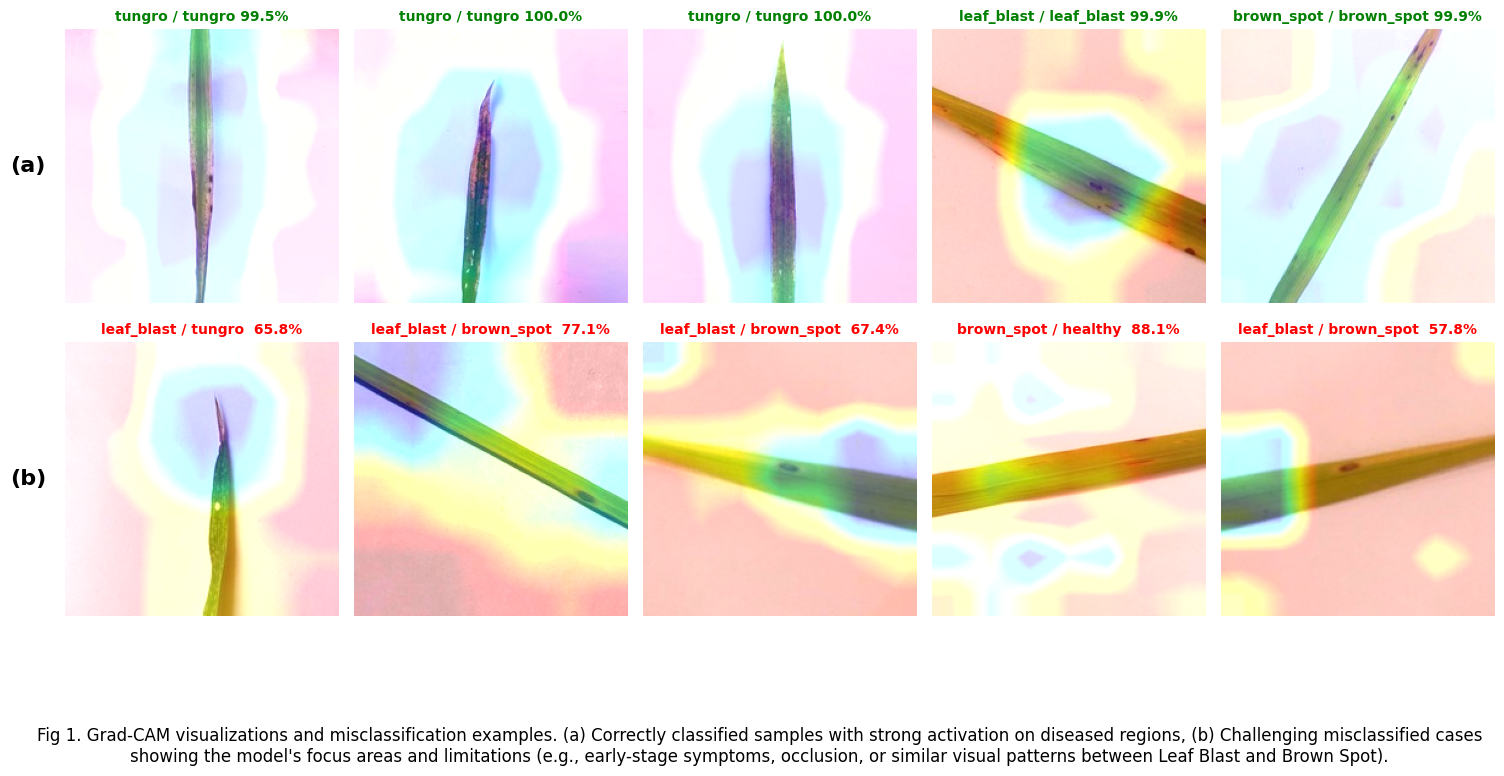

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2

# --- 1. Grad-CAM Yardımcı Fonksiyonları ---

def get_last_conv_layer_name(model):
    """Modelin son Conv2D katmanının ismini otomatik bulur."""
    for layer in reversed(model.layers):
        #print(layer.name)
        if 'Conv' in layer.name:
            print(layer.name)
            #return layer.name
            return "Conv_1"
    raise ValueError("Modelde Conv2D katmanı bulunamadı.")

def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )

    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    grads = tape.gradient(class_channel, last_conv_layer_output)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

def superimpose_heatmap(img, heatmap, alpha=0.4):
    """Isı haritasını orijinal resimle birleştirir."""
    # Isı haritasını 0-255 yap
    heatmap = np.uint8(255 * heatmap)

    # Isı haritasını resim boyutuna getir
    heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))

    # Renklendir (JET colormap)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

    # Resim verisi -1 ile 1 arasındaysa önce 0-255 arasına çekiyoruz
    if img.min() < 0:
        img = (img + 1) / 2.0

    img = np.clip(img, 0, 1) # Garanti olsun diye
    img_uint8 = np.uint8(255 * img) # 0-255 formatına çevir

    # Birleştir
    superimposed_img = heatmap * alpha + img_uint8
    superimposed_img = np.clip(superimposed_img, 0, 255).astype('uint8')

    return superimposed_img

# --- 2. Ana Görselleştirme Fonksiyonu ---

def visualize_gradcam_paper(dataset, model, class_names, correct_idxs, incorrect_idxs):

    # 2.1 Verileri Topla (Hızlı erişim için)
    print("Veriler işleniyor...")
    all_images = []
    all_labels = []

    # Tüm veriyi belleğe alıyoruz (Not: Çok büyük veri setlerinde dikkat)
    for images, labels in dataset:
        all_images.extend(images.numpy())
        all_labels.extend(labels.numpy())

    all_images = np.array(all_images)
    all_labels = np.array(all_labels)

    # Son conv katmanını bul
    last_conv_layer_name = get_last_conv_layer_name(model)
    print(f"Grad-CAM için kullanılan katman: {last_conv_layer_name}")

    num_cols = len(correct_idxs) # Sütun sayısı
    fig, axes = plt.subplots(2, num_cols, figsize=(15, 8))

    # --- (a) Correctly Classified Samples ---
    print("Doğru tahminler işleniyor...")
    for i, idx in enumerate(correct_idxs):
        img = all_images[idx]
        true_label = all_labels[idx]

        # Model tahmini
        img_array = np.expand_dims(img, axis=0)
        preds = model.predict(img_array, verbose=0)
        pred_label = np.argmax(preds[0])
        confidence = np.max(preds[0]) * 100

        # Grad-CAM
        heatmap = make_gradcam_heatmap(img_array, model, last_conv_layer_name)
        gradcam_img = superimpose_heatmap(img, heatmap)

        ax = axes[0, i]
        ax.imshow(gradcam_img)
        ax.axis('off')

        # Başlıklar
        title_color = 'green'
        ax.set_title(f"{class_names[true_label]} / {class_names[pred_label]} {confidence:.1f}%",
                     color=title_color, fontsize=10, fontweight='bold')

        if i == 0:
            ax.text(-0.2, 0.5, '(a)', transform=ax.transAxes, fontsize=16, fontweight='bold', va='center')

    # --- (b) Challenging Misclassified Cases ---
    print("Hatalı tahminler işleniyor...")
    for i, idx in enumerate(incorrect_idxs):
        # Eğer hatalı indeks listesi sütun sayısından kısaysa hata vermesin
        if i >= num_cols: break

        idx = incorrect_idxs[i]
        img = all_images[idx]
        true_label = all_labels[idx]

        # Model tahmini
        img_array = np.expand_dims(img, axis=0)
        preds = model.predict(img_array, verbose=0)
        pred_label = np.argmax(preds[0])
        confidence = np.max(preds[0]) * 100

        # Grad-CAM (Hatalı tahmin ettiği sınıfa neden baktı?)
        heatmap = make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=pred_label)
        gradcam_img = superimpose_heatmap(img, heatmap)

        ax = axes[1, i]
        ax.imshow(gradcam_img)
        ax.axis('off')

        # Başlıklar
        title_color = 'red'
        ax.set_title(f"{class_names[true_label]} / {class_names[pred_label]}  {confidence:.1f}%",
                     color=title_color, fontsize=10,fontweight='bold')

        if i == 0:
            ax.text(-0.2, 0.5, '(b)', transform=ax.transAxes, fontsize=16, fontweight='bold', va='center')

    # --- Caption Ekleme ---
    caption_text = (
        "Fig 1. Grad-CAM visualizations and misclassification examples. "
        "(a) Correctly classified samples with strong activation on diseased regions, "
        "(b) Challenging misclassified cases showing the model's focus areas and limitations "
        "(e.g., early-stage symptoms, occlusion, or similar visual patterns between Leaf Blast and Brown Spot)."
    )

    plt.tight_layout()
    plt.subplots_adjust(bottom=0.15) # Caption için alt tarafta yer aç
    plt.figtext(0.5, 0.02, caption_text, wrap=True, horizontalalignment='center', fontsize=12)

    plt.show()

# --- 3. Çalıştırma ---
# Daha önce belirlediğiniz indeksleri buraya girin

correct_indices_list = selected_correct
incorrect_indices_list = selected_incorrect

visualize_gradcam_paper(val_ds, model, class_names, correct_indices_list, incorrect_indices_list)

In [ ]:
model.summary()

Model: "MobileNetV2_Dual_SE"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer_1[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 5,906,589 (22.53 MB)

 Trainable params: 1,216,201 (4.64 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

 Optimizer params: 2,432,404 (9.28 MB)

#  ================= jetson nano için aktarma ======================

## 1. yöntem TFlite

In [ ]:
import tensorflow as tf
import os

# Model dosyasını yükle
model_path = './sonuc/dbla_rice_model.keras'
model = tf.keras.models.load_model(model_path)

# TFLite dönüştürücüyü oluştur
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.target_spec.supported_types = [tf.float32]  # veya tf.float16 daha az bellek için
tflite_model = converter.convert()

# TFLite modelini kaydet
tflite_model_path = os.path.join('./sonuc', 'dbla_rice_model.tflite')
with open(tflite_model_path, 'wb') as f:
    f.write(tflite_model)

Saved artifact at '/tmp/tmp94mcc_6z'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='input_layer_1')
Output Type:
  TensorSpec(shape=(None, 5), dtype=tf.float32, name=None)
Captures:
  139075673442256: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139071742458960: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139071742459152: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139075673455120: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139071742458384: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139071742459344: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139071742457616: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139071742459728: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139071742458576: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139071742457232: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1390717424595

## =========================== ONNX Dönüşümü =============================

In [ ]:
!pip install tf2onnx

INFO: pip is looking at multiple versions of onnx to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.8/455.8 kB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 99.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.1/162.1 kB 13.3 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 5.29.5
    Uninstalling protobuf-5.29.5:
      Successfully uninstalled protobuf-5.29.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
grpcio-status 1.71.2 requires protobuf<6.0dev,>=5.26.1, but you have protobuf 3.20.3 which is incompatible.
tensorflow-metadata 1.17.2 requires protobuf>=4.25.2; python_version >= "3.11", but you have protobuf 3.20.3 which is incompatible.
ydf 0.13.0 requires protobuf<7.0.0,>=5.2

In [ ]:
import os
import tensorflow as tf
import tf2onnx
import subprocess
# from tensorflow.python.framework.convert_to_constants import convert_variables_to_constant_value

# --- Settings ---
KERAS_MODEL_PATH = "./sonuc/dbla_rice_model.keras"
SAVED_MODEL_PATH = "./saved_model"
ONNX_MODEL_PATH = "./dbla_rice_model.onnx"
TRT_ENGINE_PATH = "./dbla_rice_model.engine"
OPSET = 11  # Lowered to ensure compatibility
FP16_MODE = False  # Disabled FP16 initially to avoid issues

# Ensure output directories exist
os.makedirs("./saved_model", exist_ok=True)
os.makedirs("./fig", exist_ok=True)  # For potential future plots

# 1. Load Keras model
print(f"[1] Loading Keras model: {KERAS_MODEL_PATH}")
try:
    model = tf.keras.models.load_model(KERAS_MODEL_PATH)
    print("Model loaded successfully.")
except Exception as e:
    print(f"Error loading model: {e}")
    exit(1)

# 2. Convert to SavedModel (required for tf2onnx compatibility)
print(f"[2] Converting to SavedModel: {SAVED_MODEL_PATH}")
tf.saved_model.save(model, SAVED_MODEL_PATH)

# 3. Convert SavedModel to ONNX
print(f"[3] Converting to ONNX: {ONNX_MODEL_PATH}")
try:
    # Define input signature explicitly
    input_signature = [tf.TensorSpec([1, 224, 224, 3], tf.float32, name='input')]  # Adjust if input shape differs
    onnx_model, _ = tf2onnx.convert.from_keras(
        model,
        opset=OPSET,
        input_signature=input_signature,
        output_path=ONNX_MODEL_PATH
    )
    print(f"✅ ONNX model saved: {ONNX_MODEL_PATH}")
except Exception as e:
    print(f"Error converting to ONNX: {e}")
    exit(1)

# 4. Create TensorRT engine
print(f"[4] Creating TensorRT engine: {TRT_ENGINE_PATH}")
try:
    fp16_flag = "--fp16" if FP16_MODE else ""
    cmd = f"/usr/src/tensorrt/bin/trtexec --onnx={ONNX_MODEL_PATH} --saveEngine={TRT_ENGINE_PATH} {fp16_flag}"
    result = subprocess.run(cmd, shell=True, capture_output=True, text=True)
    if result.returncode == 0:
        print(f"✅ TensorRT engine saved: {TRT_ENGINE_PATH}")
    else:
        print(f"Error creating TensorRT engine: {result.stderr}")
except subprocess.CalledProcessError as e:
    print(f"Subprocess error: {e.stderr}")
    exit(1)

print("🚀 Conversion completed!")

[1] Loading Keras model: ./sonuc/dbla_rice_model.keras
Model loaded successfully.
[2] Converting to SavedModel: ./saved_model


TypeError: this __dict__ descriptor does not support '_DictWrapper' objects

In [ ]:

import onnx
model = onnx.load("dbla_rice_model.onnx")
onnx.checker.check_model(model)